In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from scipy import stats

sns.set_theme()

print("Seaborn: {}".format(sns.__version__))
print("NumPy: {}".format(np.__version__))

Seaborn: 0.11.0
NumPy: 1.17.4


In [3]:
# Usable list

info = ["SEX","EDUCATION","MARRIAGE","AGE"]
delay_n = ["PAY_APR", "PAY_MAY", "PAY_JUN", "PAY_JUL", "PAY_AUG", "PAY_SEP"]
bill_n = ["BILL_AMT_APR", "BILL_AMT_MAY", "BILL_AMT_JUN", "BILL_AMT_JUL", "BILL_AMT_AUG", "BILL_AMT_SEP"]
pay_n = ["PAY_AMT_APR", "PAY_AMT_MAY", "PAY_AMT_JUN", "PAY_AMT_JUL", "PAY_AMT_AUG", "PAY_AMT_SEP"]

In [34]:
train = pd.read_csv("C:/Users/chowonjae/Desktop/내부 프로젝트/uci_creditcard-train-0.0-0.0 (1).csv")
test = pd.read_csv("C:/Users/chowonjae/Desktop/내부 프로젝트/uci_creditcard-test-0.0-0.0 (1).csv")

length = len(train)

rename_dict =  {"default payment next month":"default", 
                                "PAY_6" : "PAY_APR", 
                                "PAY_5" : "PAY_MAY", 
                                "PAY_4" : "PAY_JUN",  
                                "PAY_3" : "PAY_JUL",
                                "PAY_2": "PAY_AUG", 
                                "PAY_0": "PAY_SEP", 
                                "PAY_AMT6": "PAY_AMT_APR", 
                                "PAY_AMT5": "PAY_AMT_MAY", 
                                "PAY_AMT4": "PAY_AMT_JUN",
                                "PAY_AMT3": "PAY_AMT_JUL", 
                                "PAY_AMT2": "PAY_AMT_AUG", 
                                "PAY_AMT1": "PAY_AMT_SEP", 
                                "BILL_AMT6": "BILL_AMT_APR", 
                                "BILL_AMT5": "BILL_AMT_MAY", 
                                "BILL_AMT4": "BILL_AMT_JUN", 
                                "BILL_AMT3": "BILL_AMT_JUL", 
                                "BILL_AMT2": "BILL_AMT_AUG",
                                "BILL_AMT1": "BILL_AMT_SEP"}

#Change the column name "default payment next month" -> "default"
train = train.rename(columns = rename_dict)
test = test.rename(columns = rename_dict)

train = train.drop(["sep_idx"], axis = 1)
train_drop_info = train.drop(info, axis = 1)

test = test.drop(["sep_idx"], axis = 1)

# Change Type

train["ID"] = train["ID"].astype(np.int)
train["SEX"] = train["SEX"].astype(np.int)
train["EDUCATION"] = train["EDUCATION"].astype(np.int)
train["MARRIAGE"] = train["MARRIAGE"].astype(np.int)
train["AGE"] = train["AGE"].astype(np.int)
train["default"] = train["default"].astype(np.int)
train[delay_n] = train[delay_n].astype(np.int)

test["ID"] = test["ID"].astype(np.int)
test["SEX"] = test["SEX"].astype(np.int)
test["EDUCATION"] = test["EDUCATION"].astype(np.int)
test["MARRIAGE"] = test["MARRIAGE"].astype(np.int)
test["AGE"] = test["AGE"].astype(np.int)
test["default"] = test["default"].astype(np.int)
test[delay_n] = test[delay_n].astype(np.int)

In [35]:
X_train = train.drop("default", axis = 1)
y_train = train["default"]

In [37]:
BILL_DATA = train[bill_n + ["ID", "default", "PAY_SEP"]]

In [39]:
BILL_DATA = pd.melt(BILL_DATA, id_vars = ["ID","default", "PAY_SEP"], var_name = "TIME", value_name = "BILL_AMT")

In [42]:
BILL_DATA[BILL_DATA["ID"] == 1]

,ID,default,PAY_SEP,TIME,BILL_AMT
17992,1,1,2,BILL_AMT_APR,0.0
41988,1,1,2,BILL_AMT_MAY,0.0
65984,1,1,2,BILL_AMT_JUN,0.0
89980,1,1,2,BILL_AMT_JUL,689.0
113976,1,1,2,BILL_AMT_AUG,3102.0
137972,1,1,2,BILL_AMT_SEP,3913.0


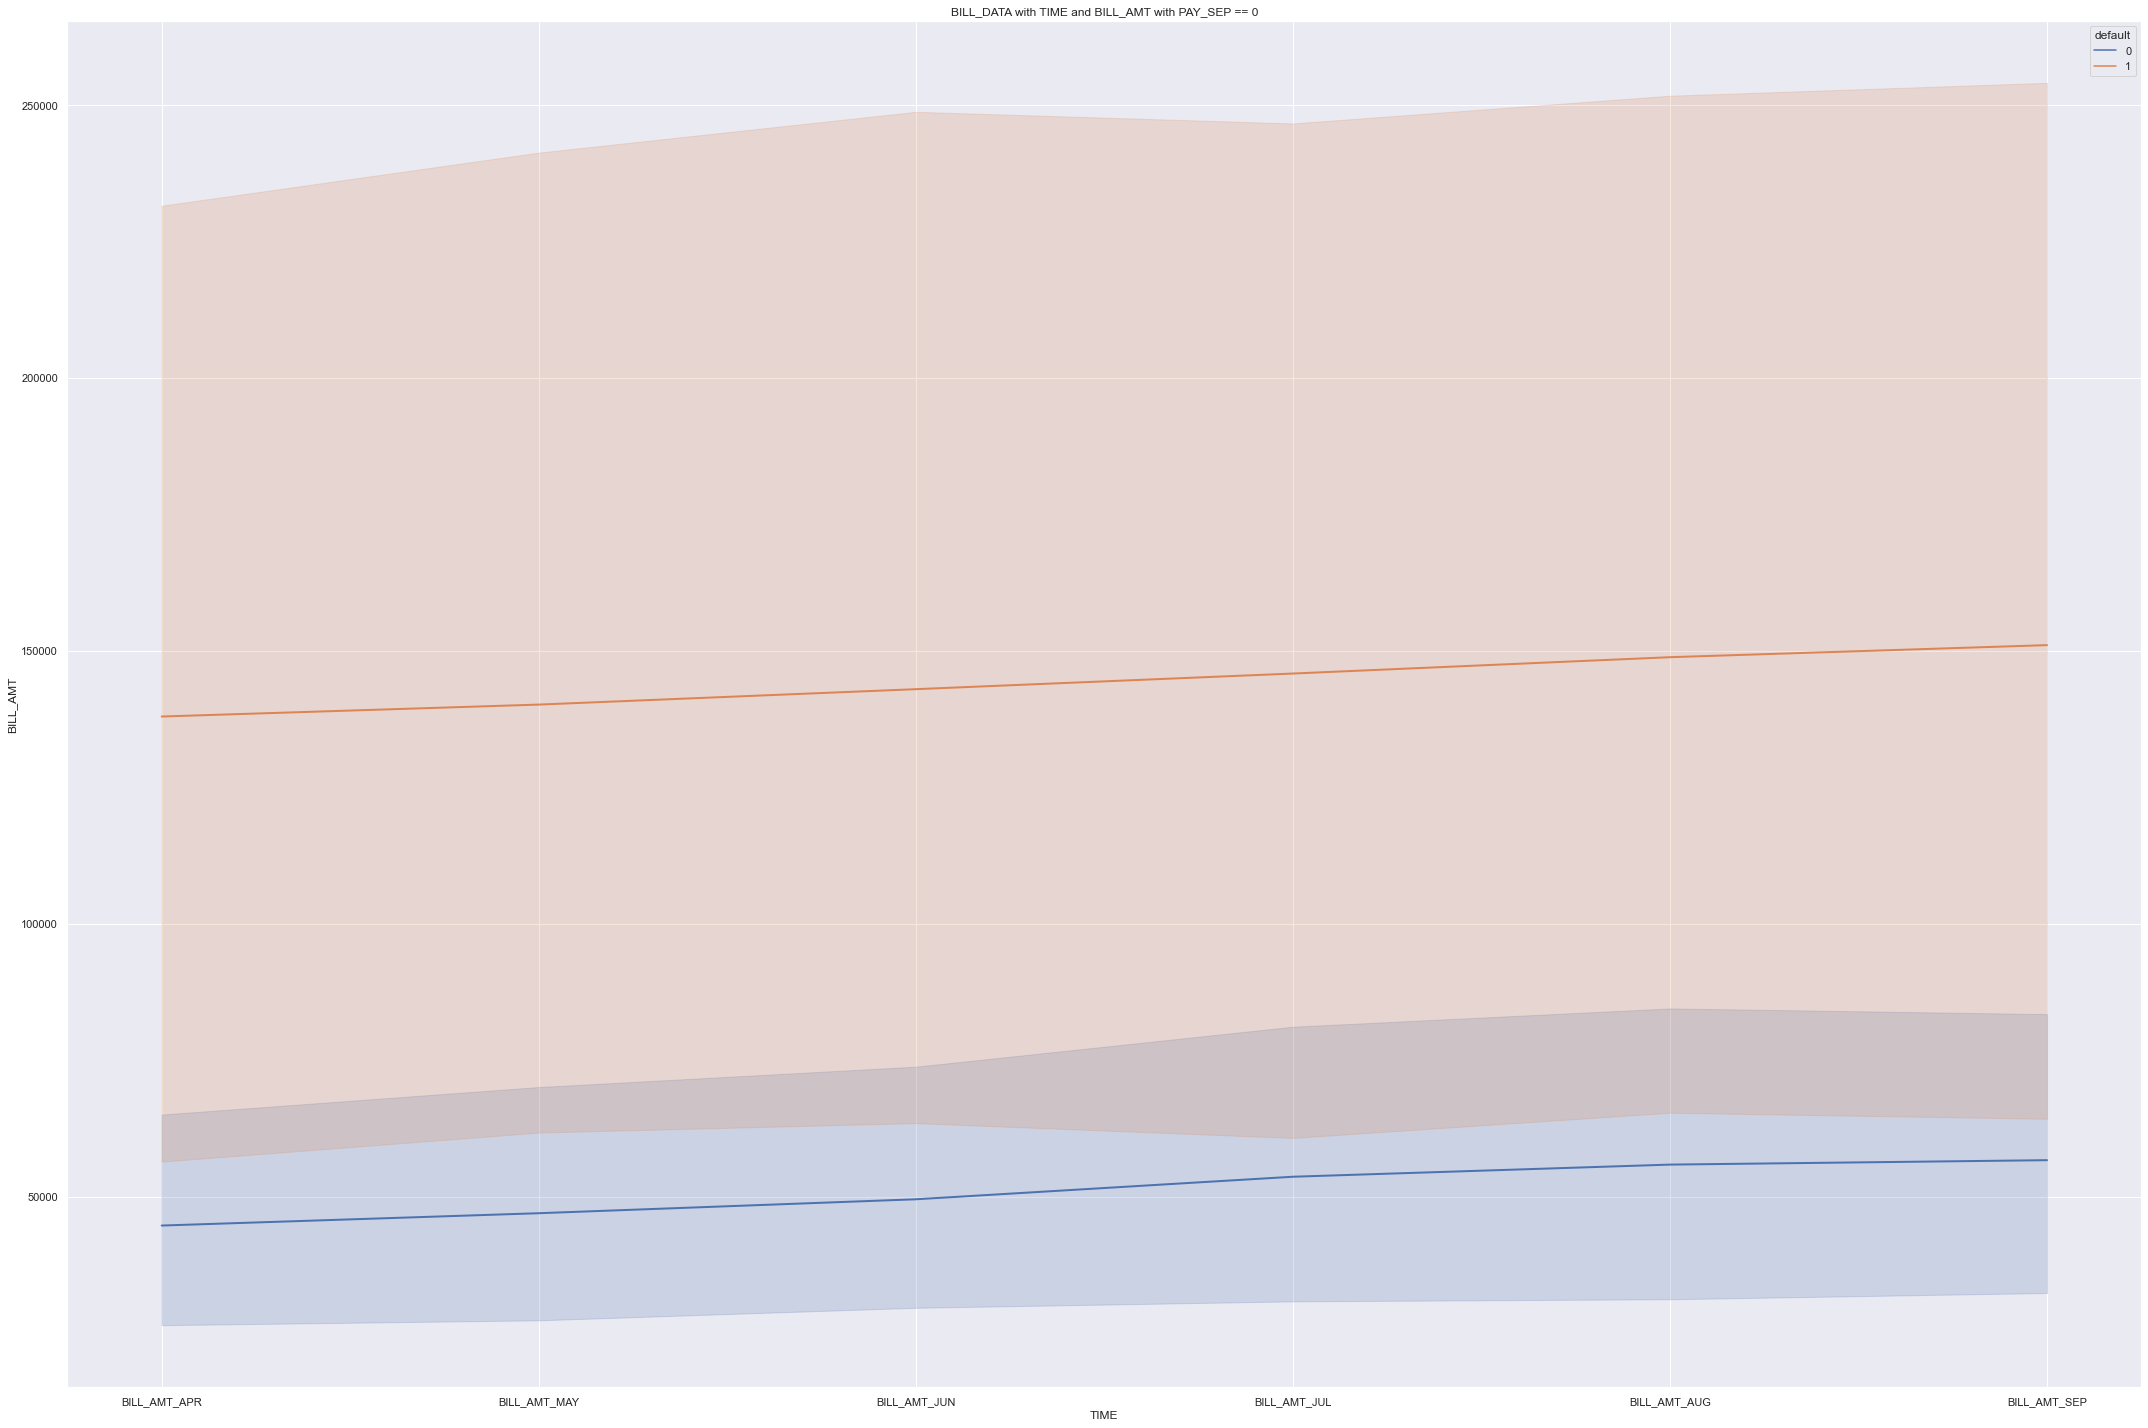

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == 8"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

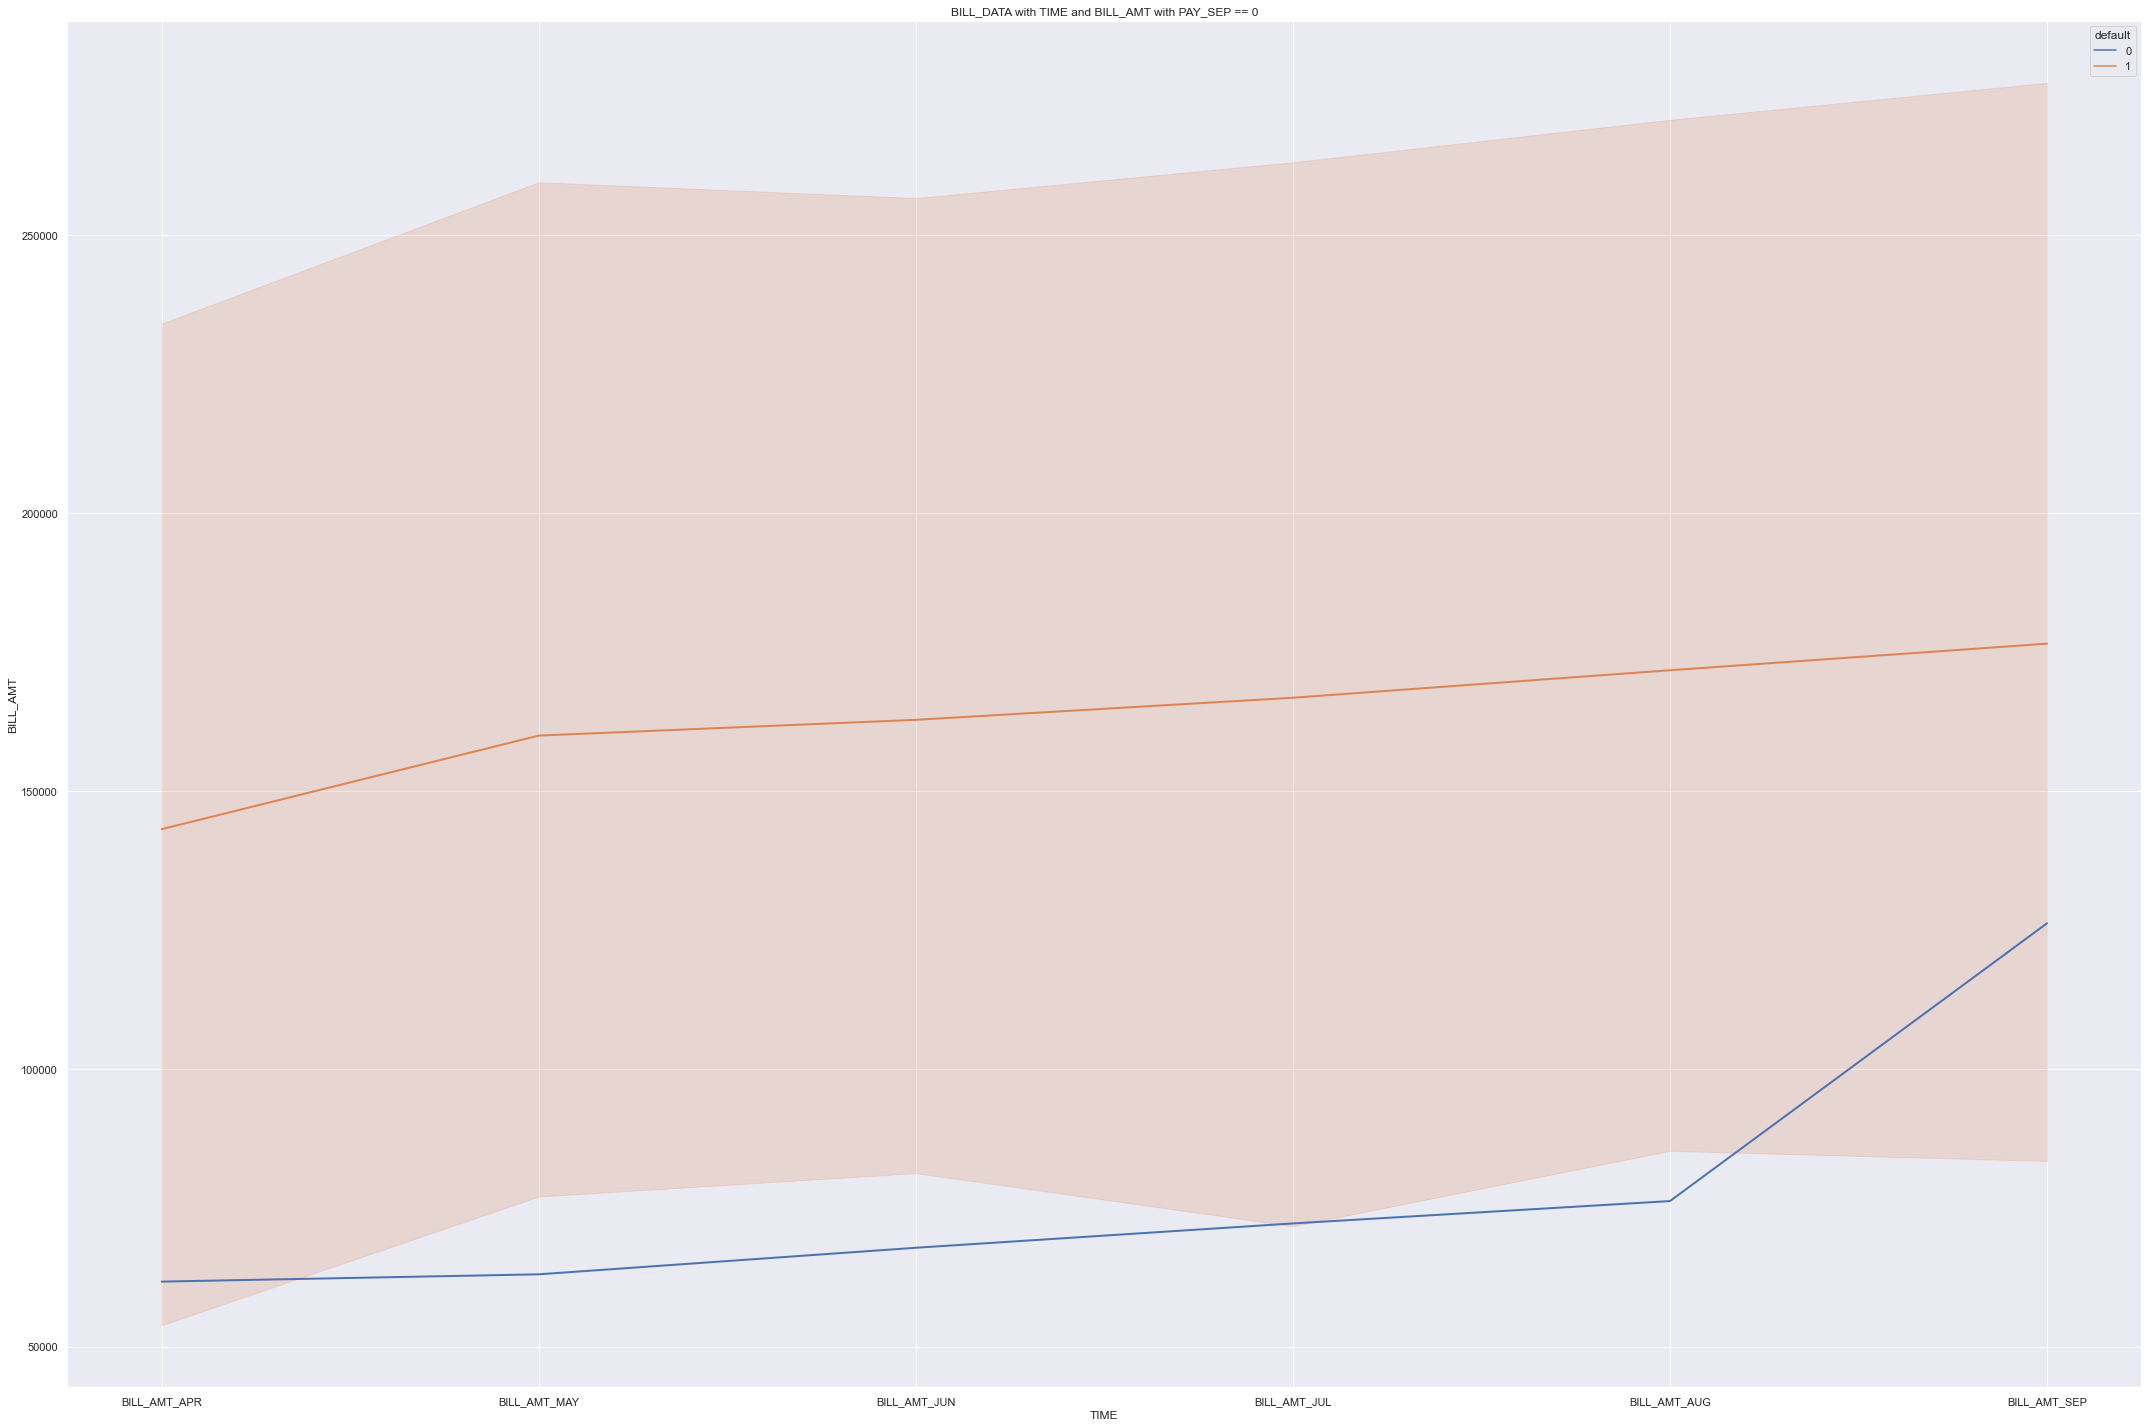

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == 7"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

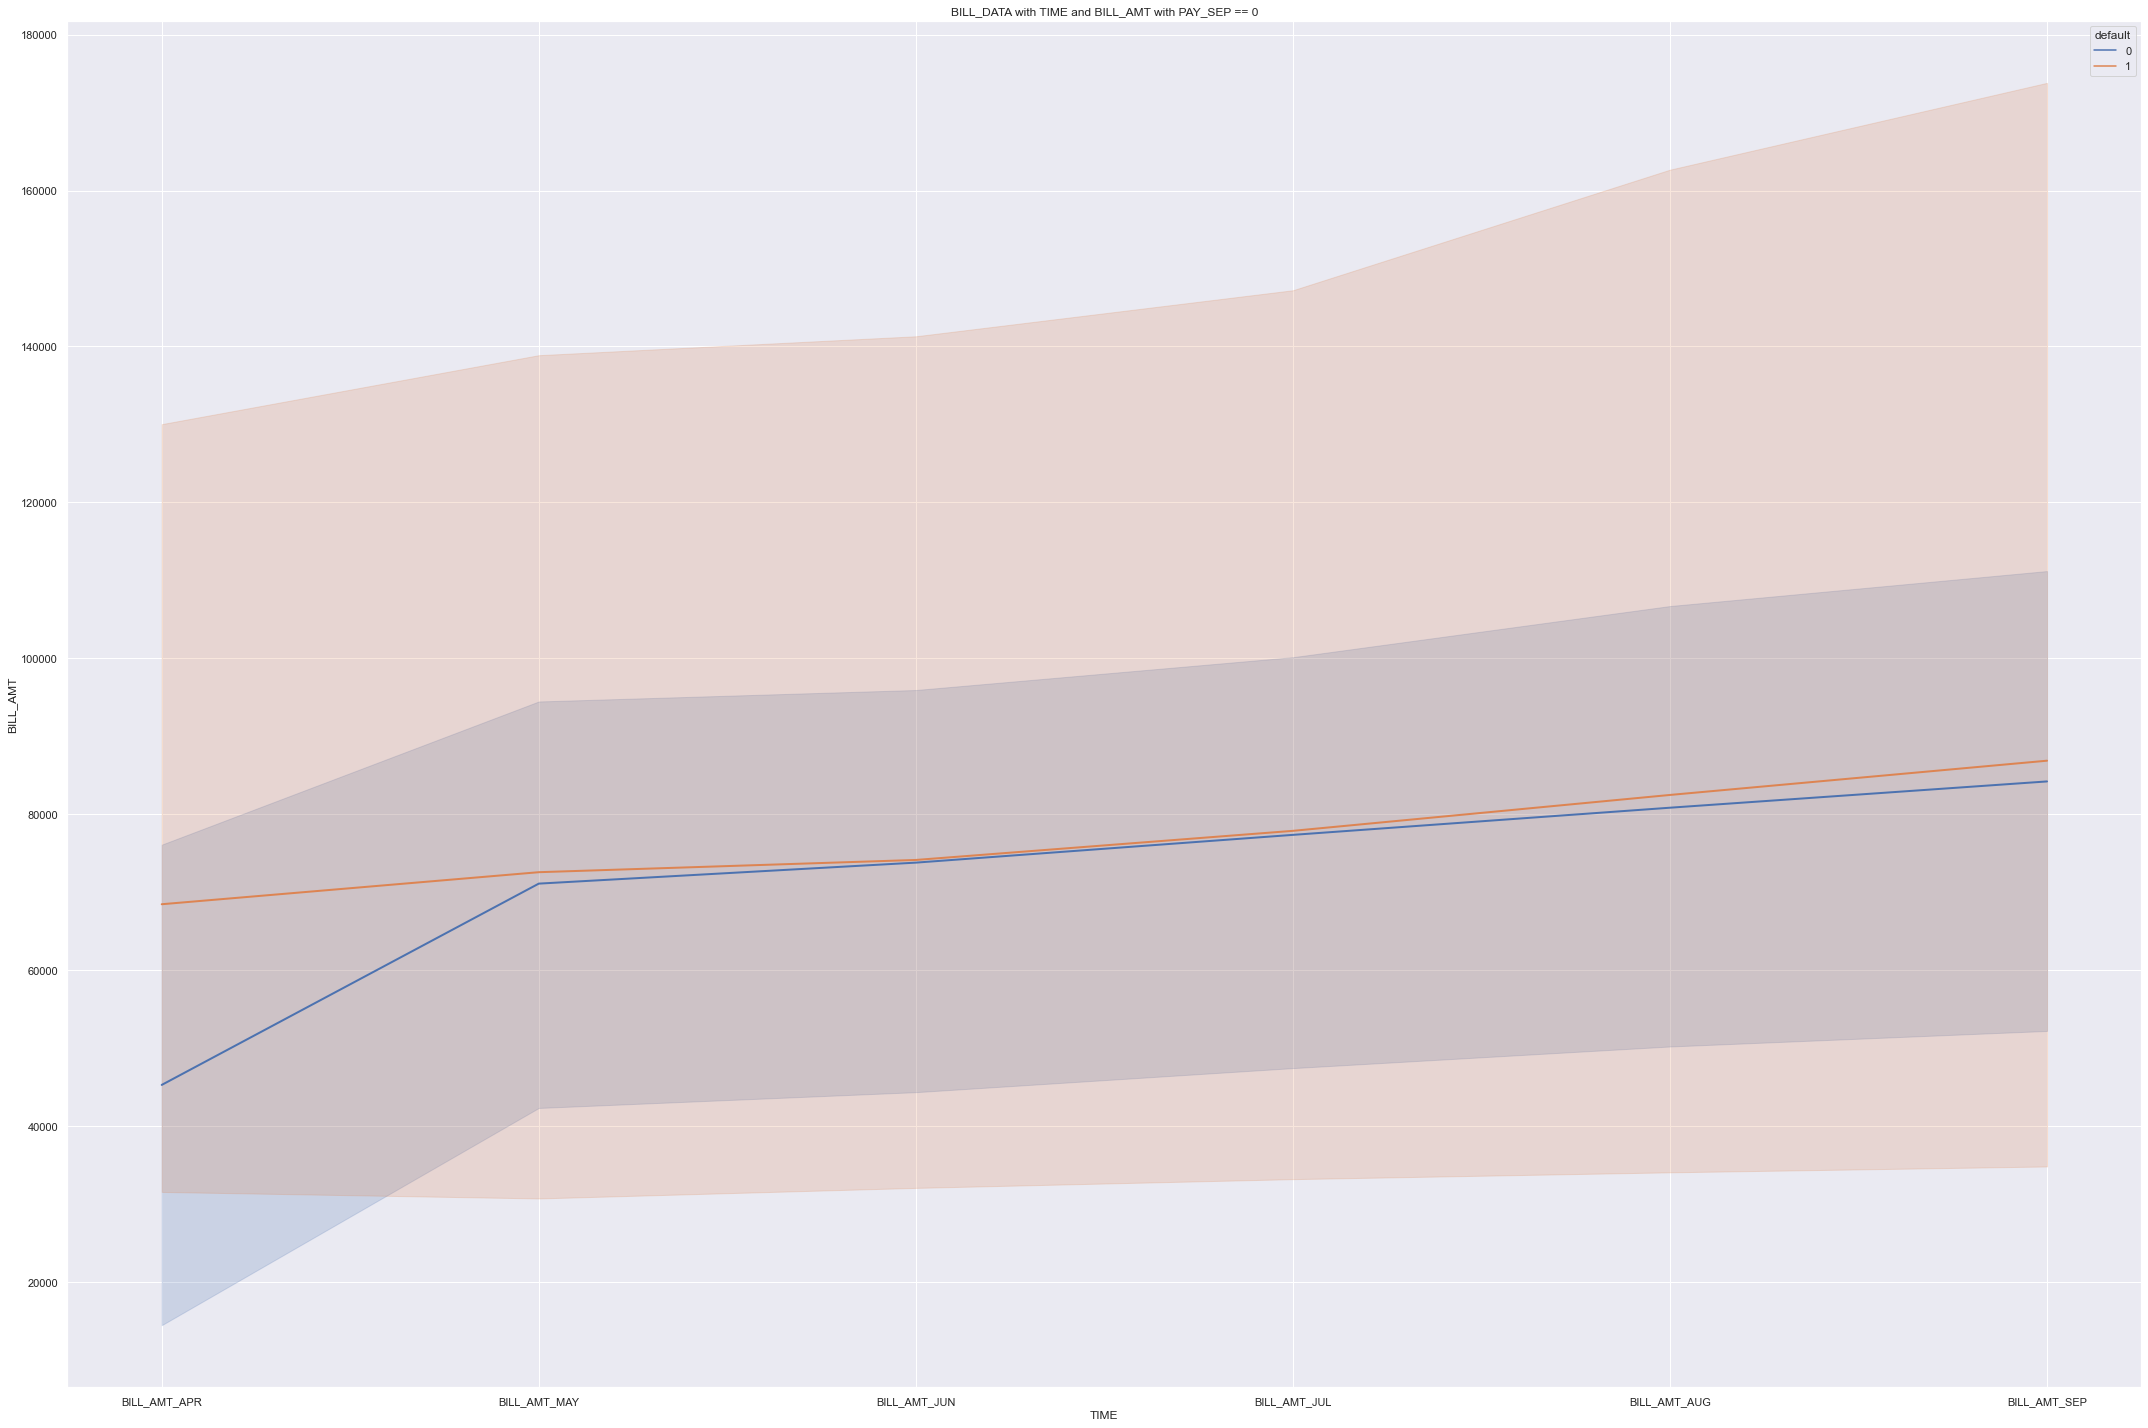

In [57]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == 6"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

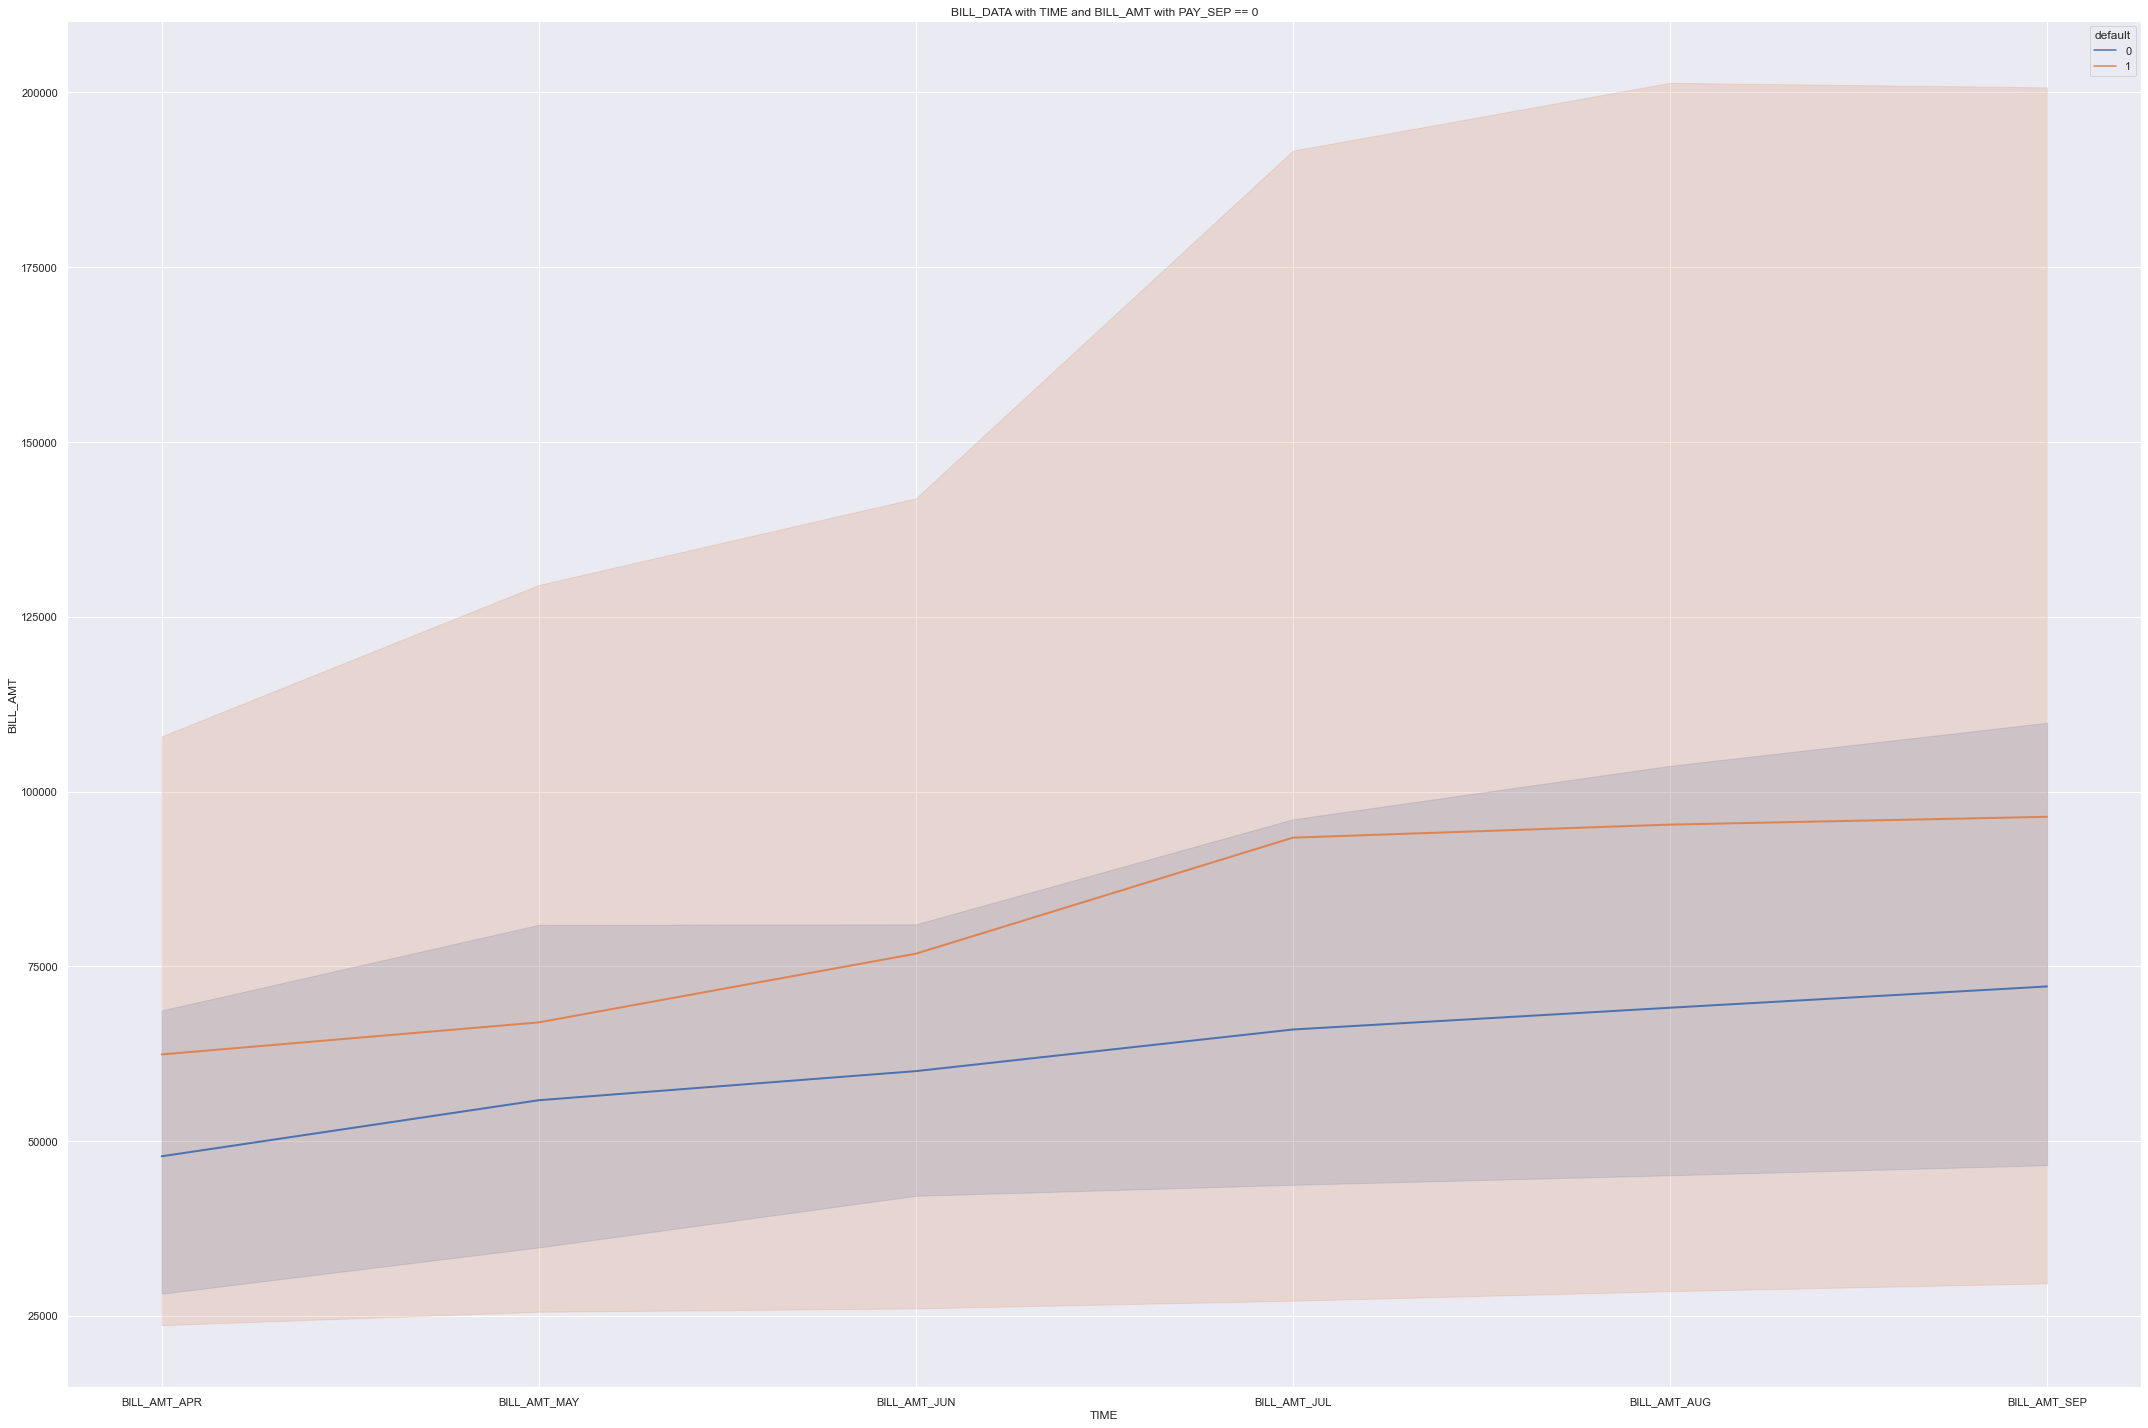

In [58]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == 5"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

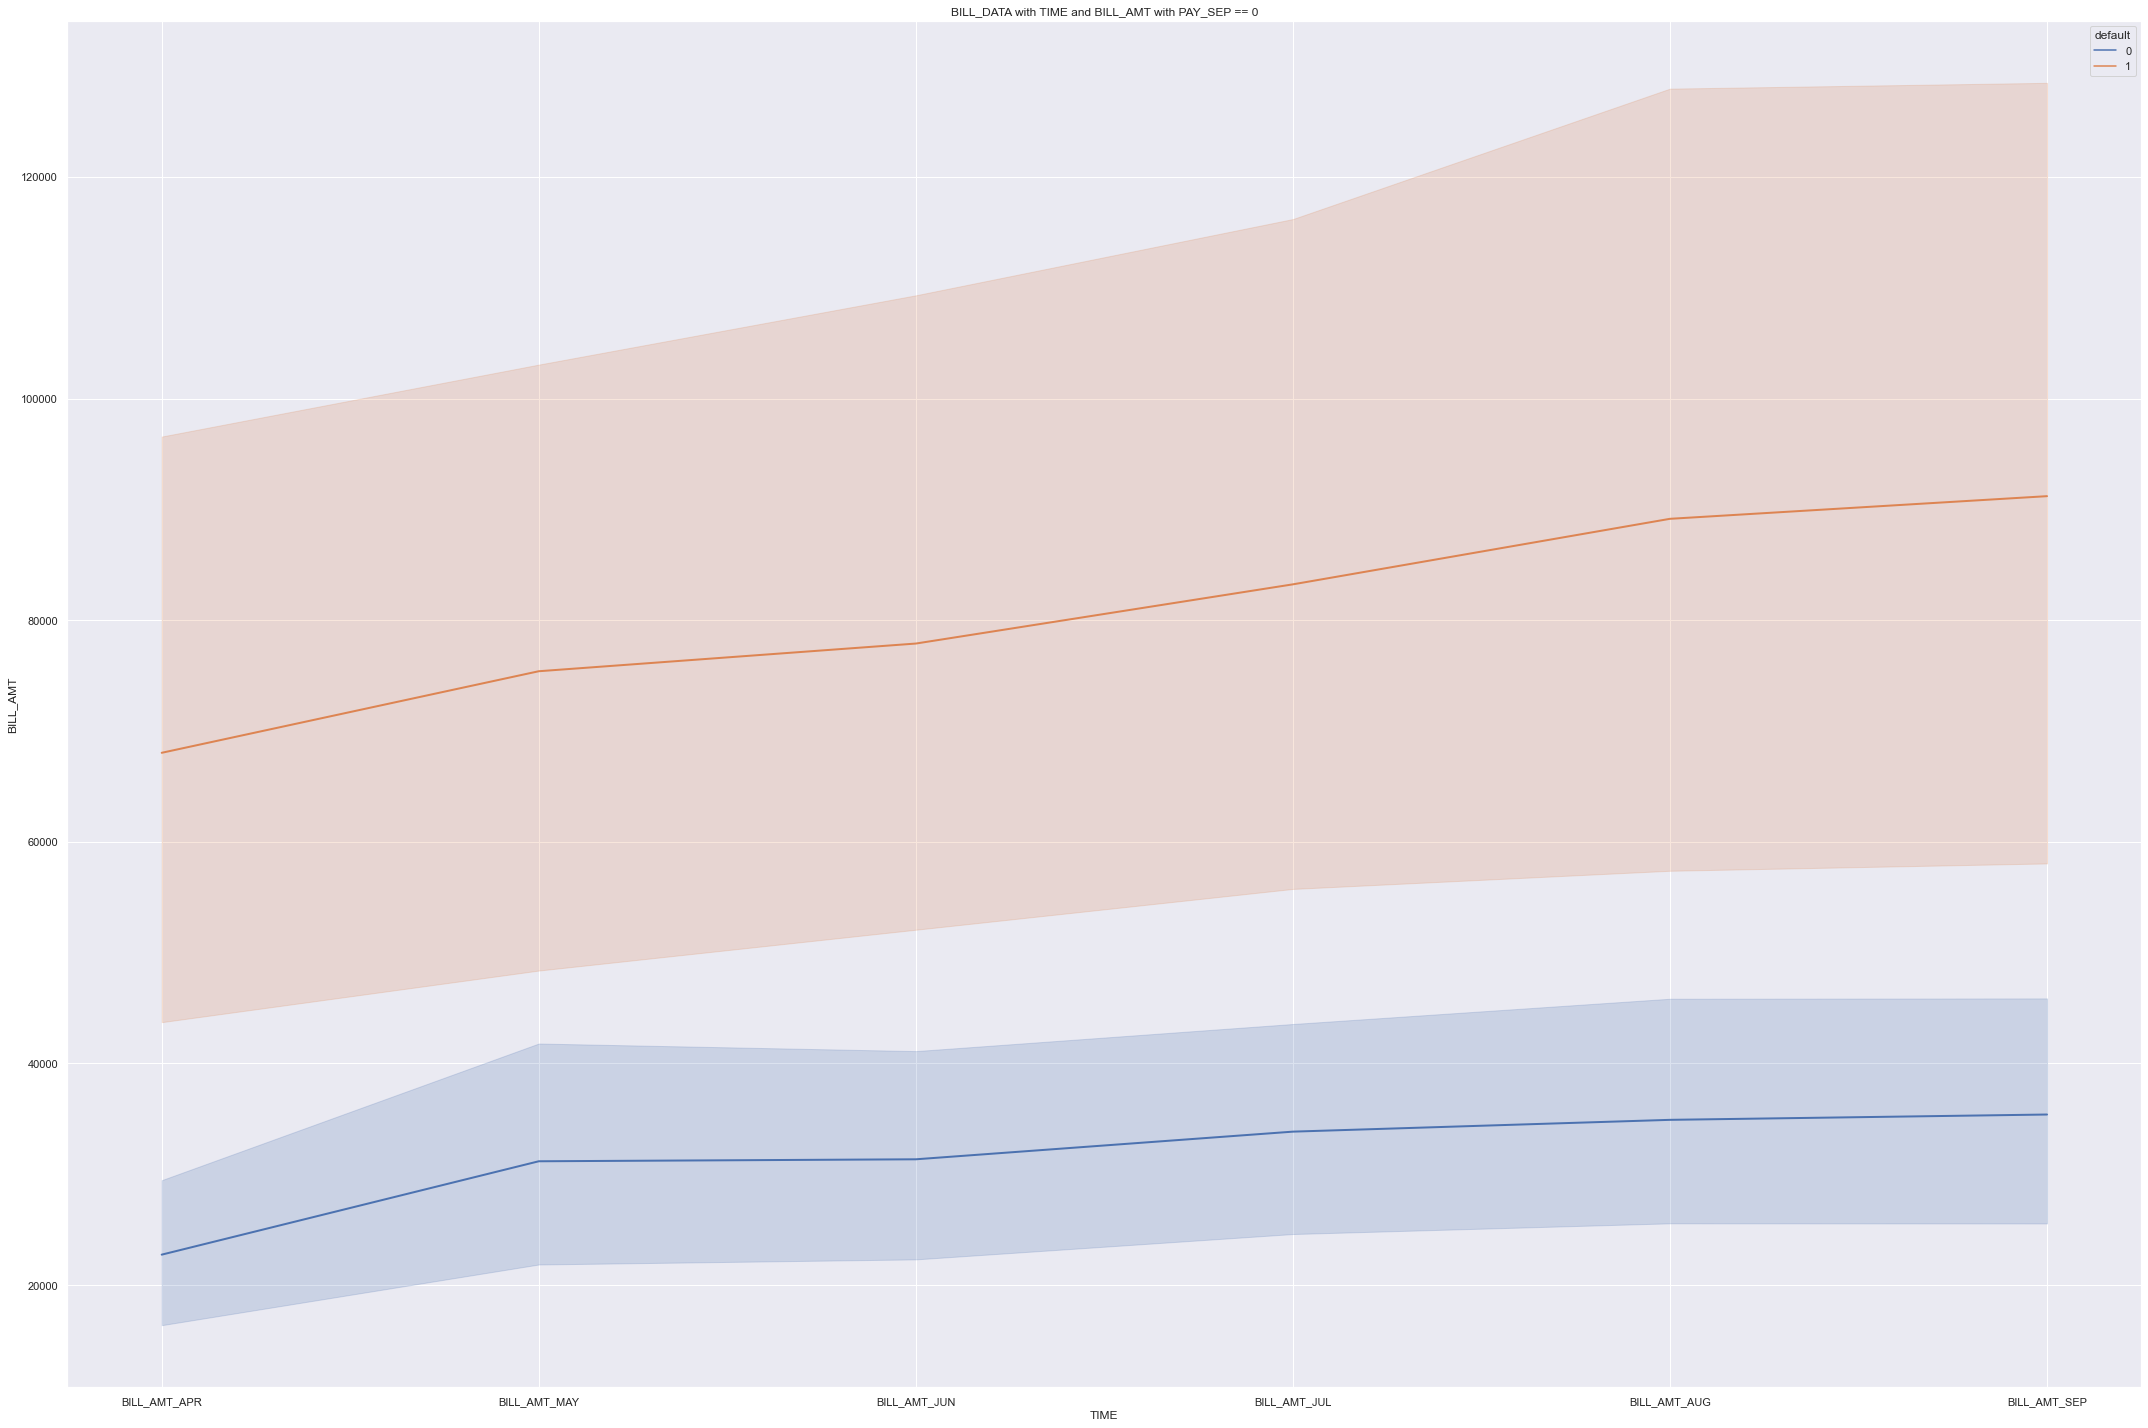

In [59]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == 4"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

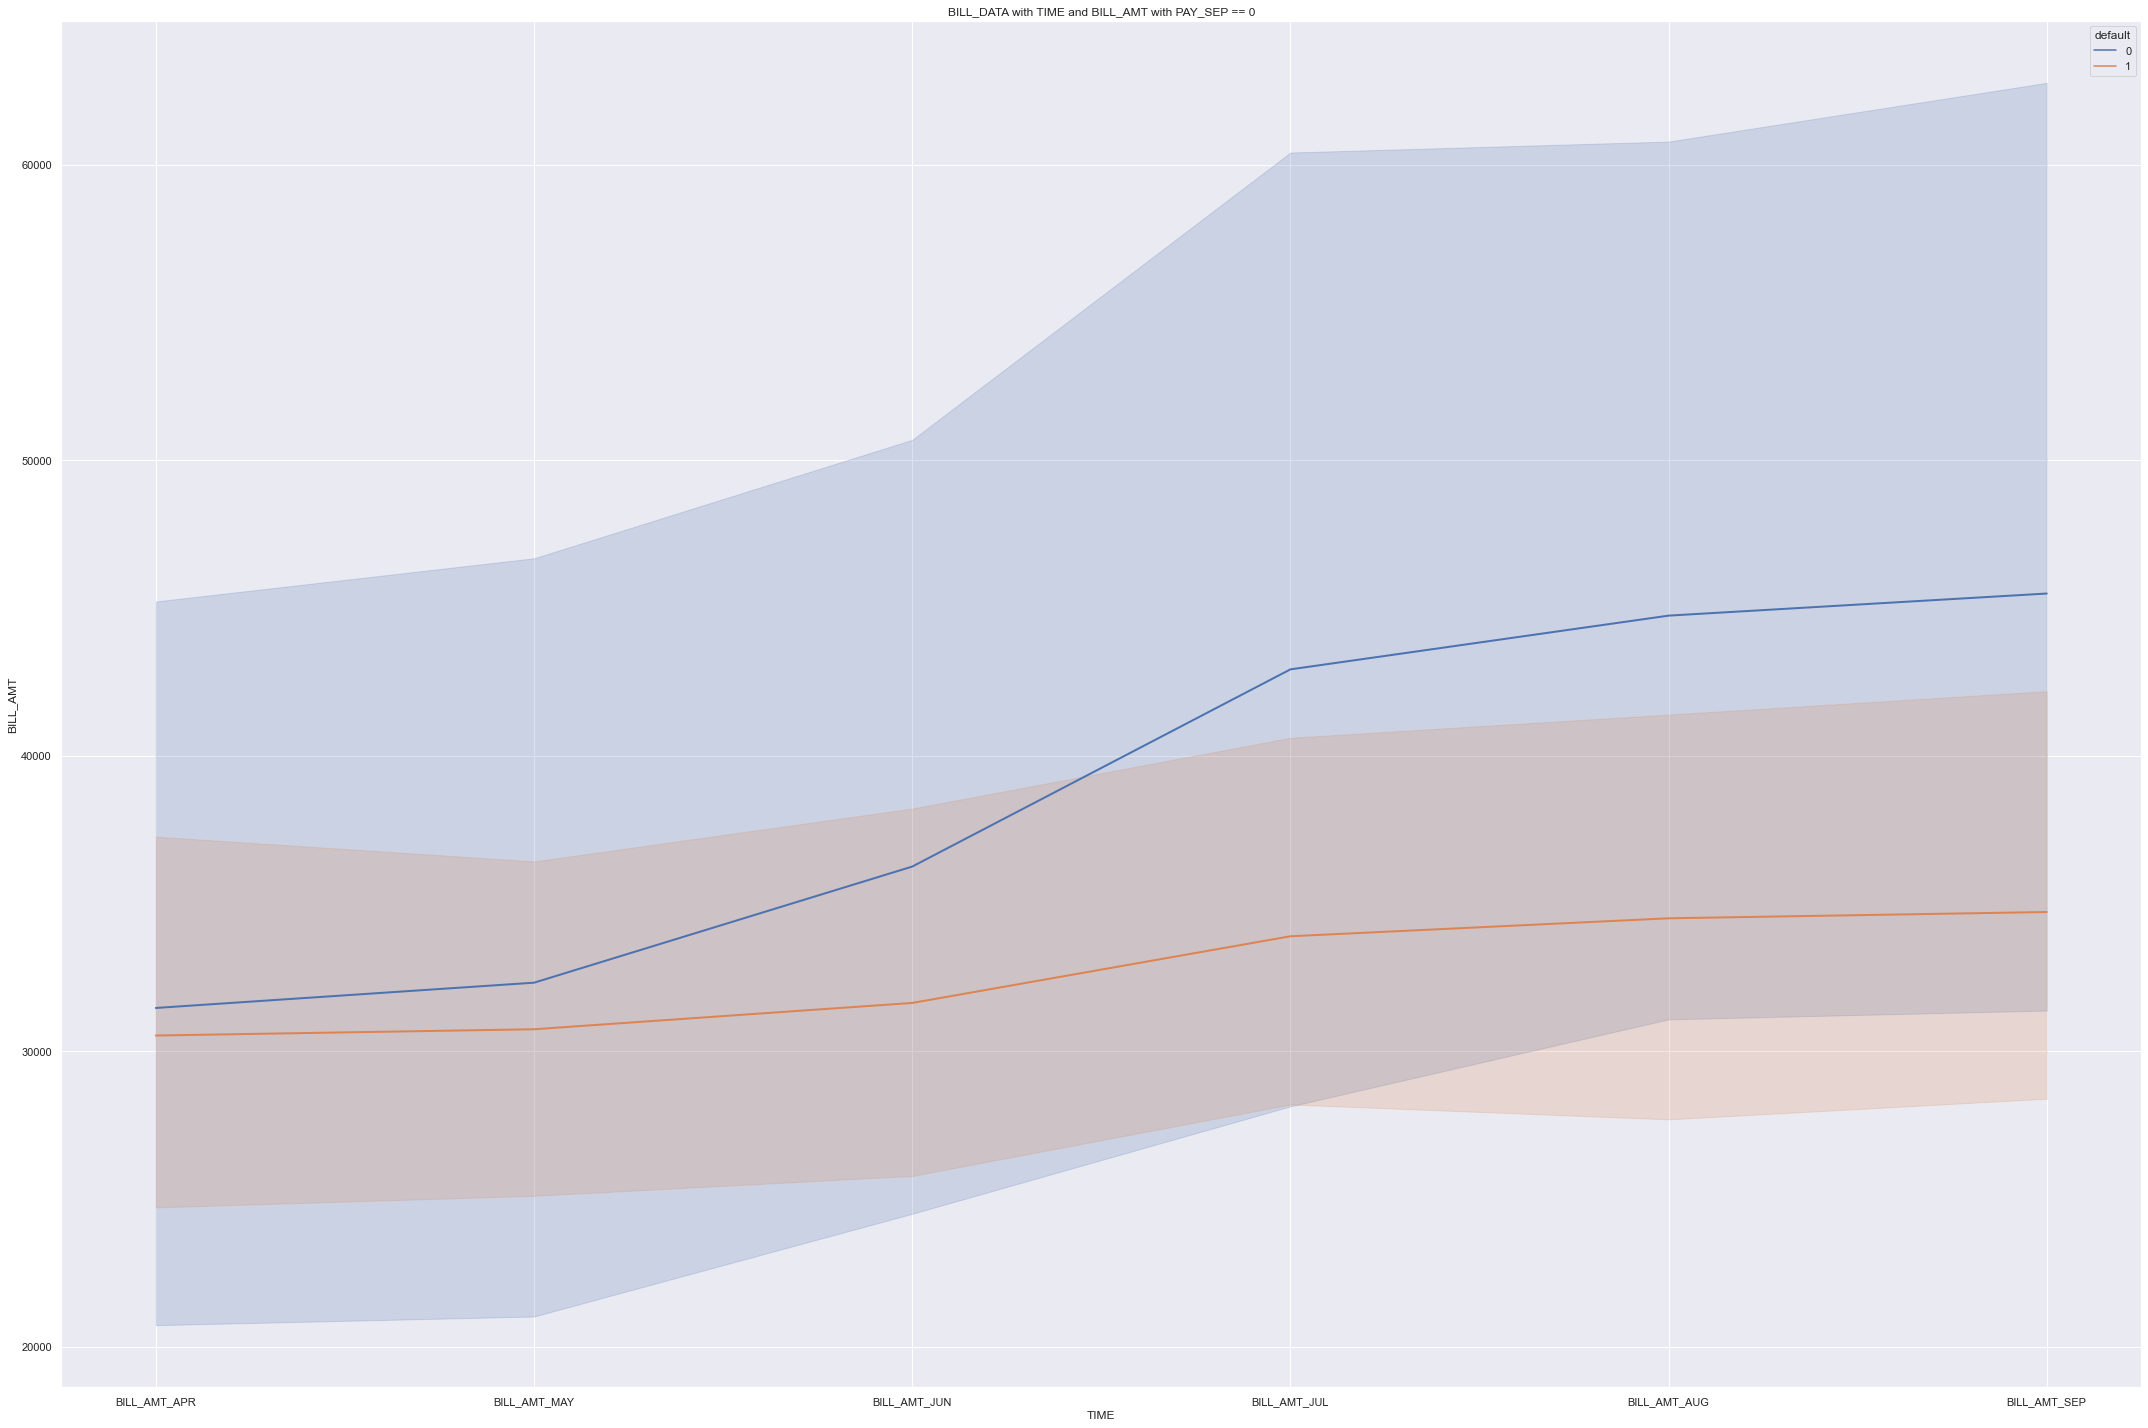

In [60]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == 3"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

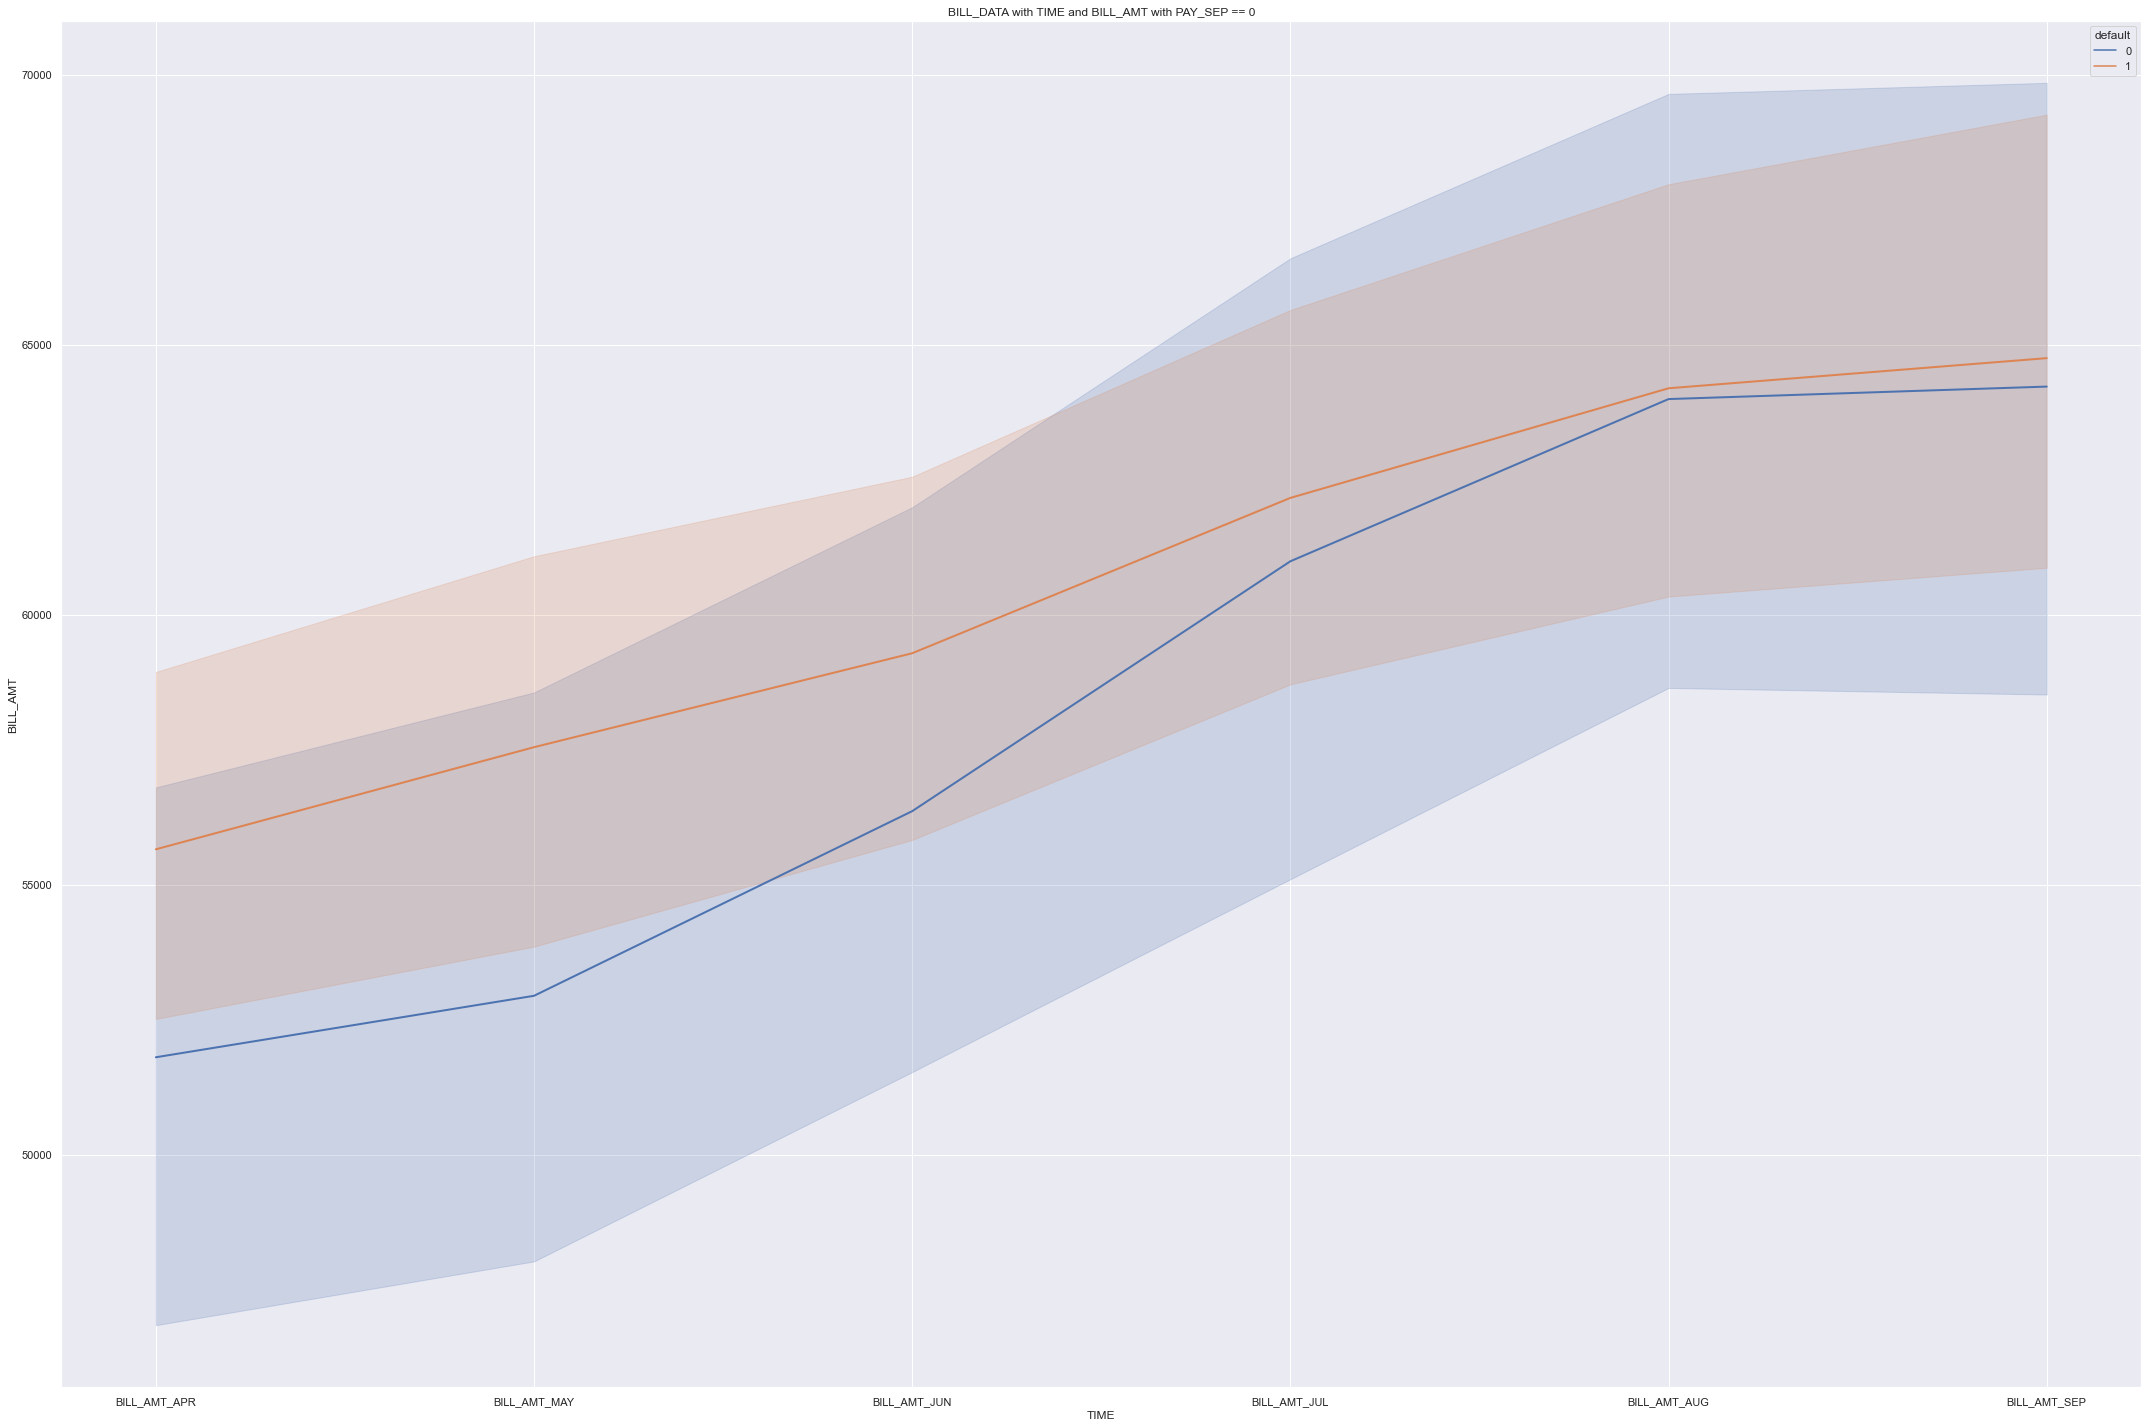

In [61]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == 2"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

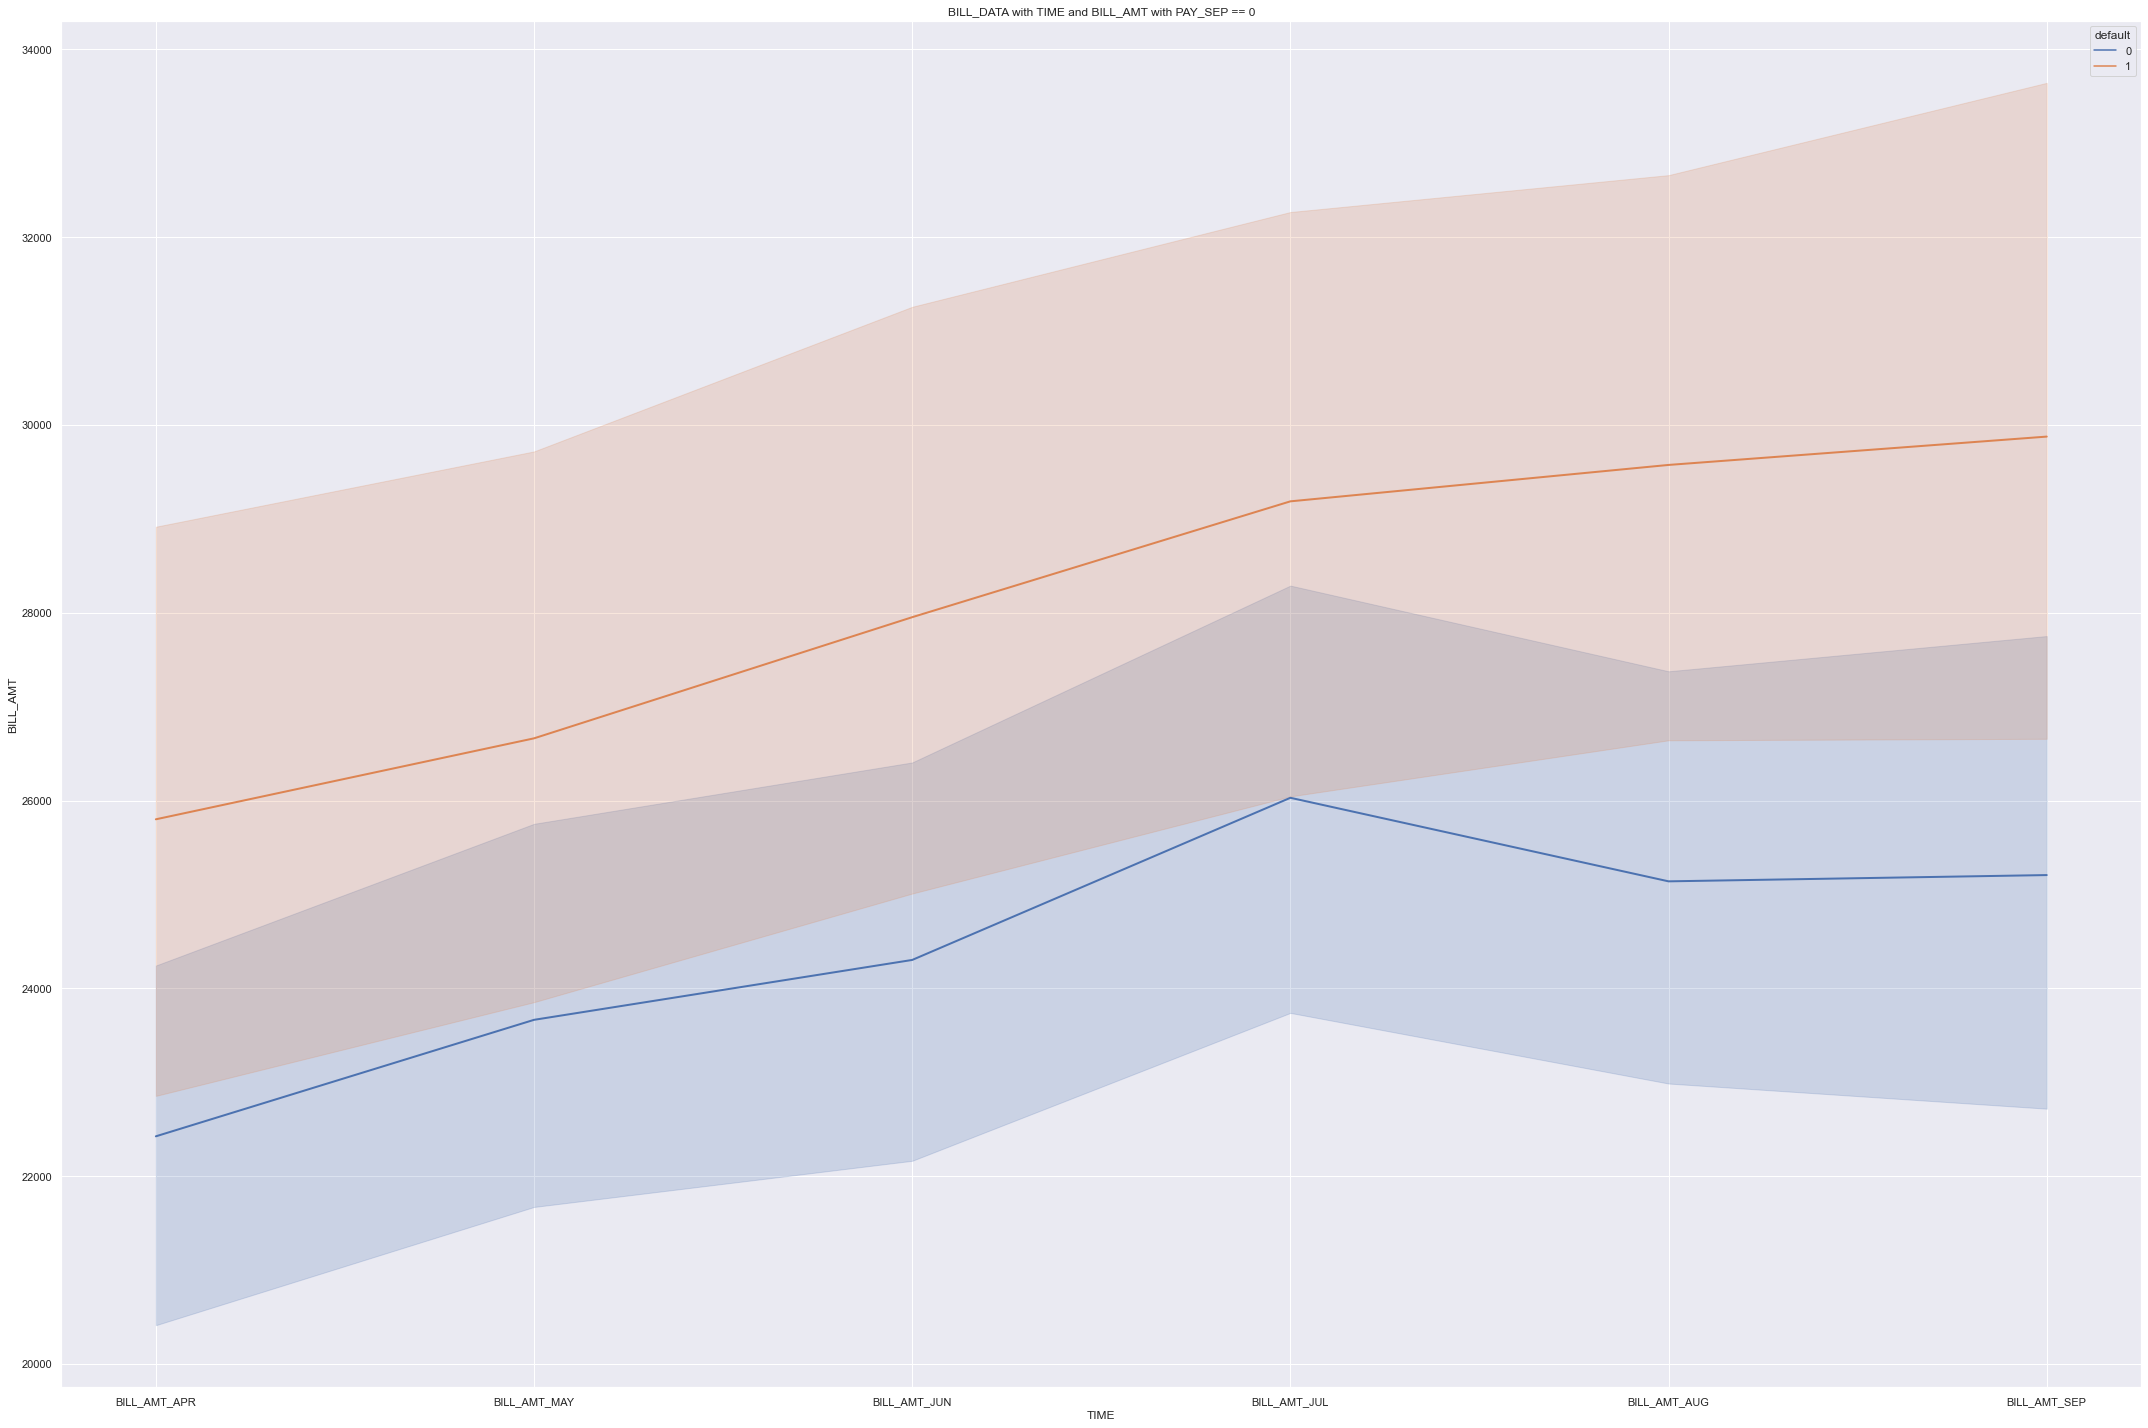

In [62]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == 1"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

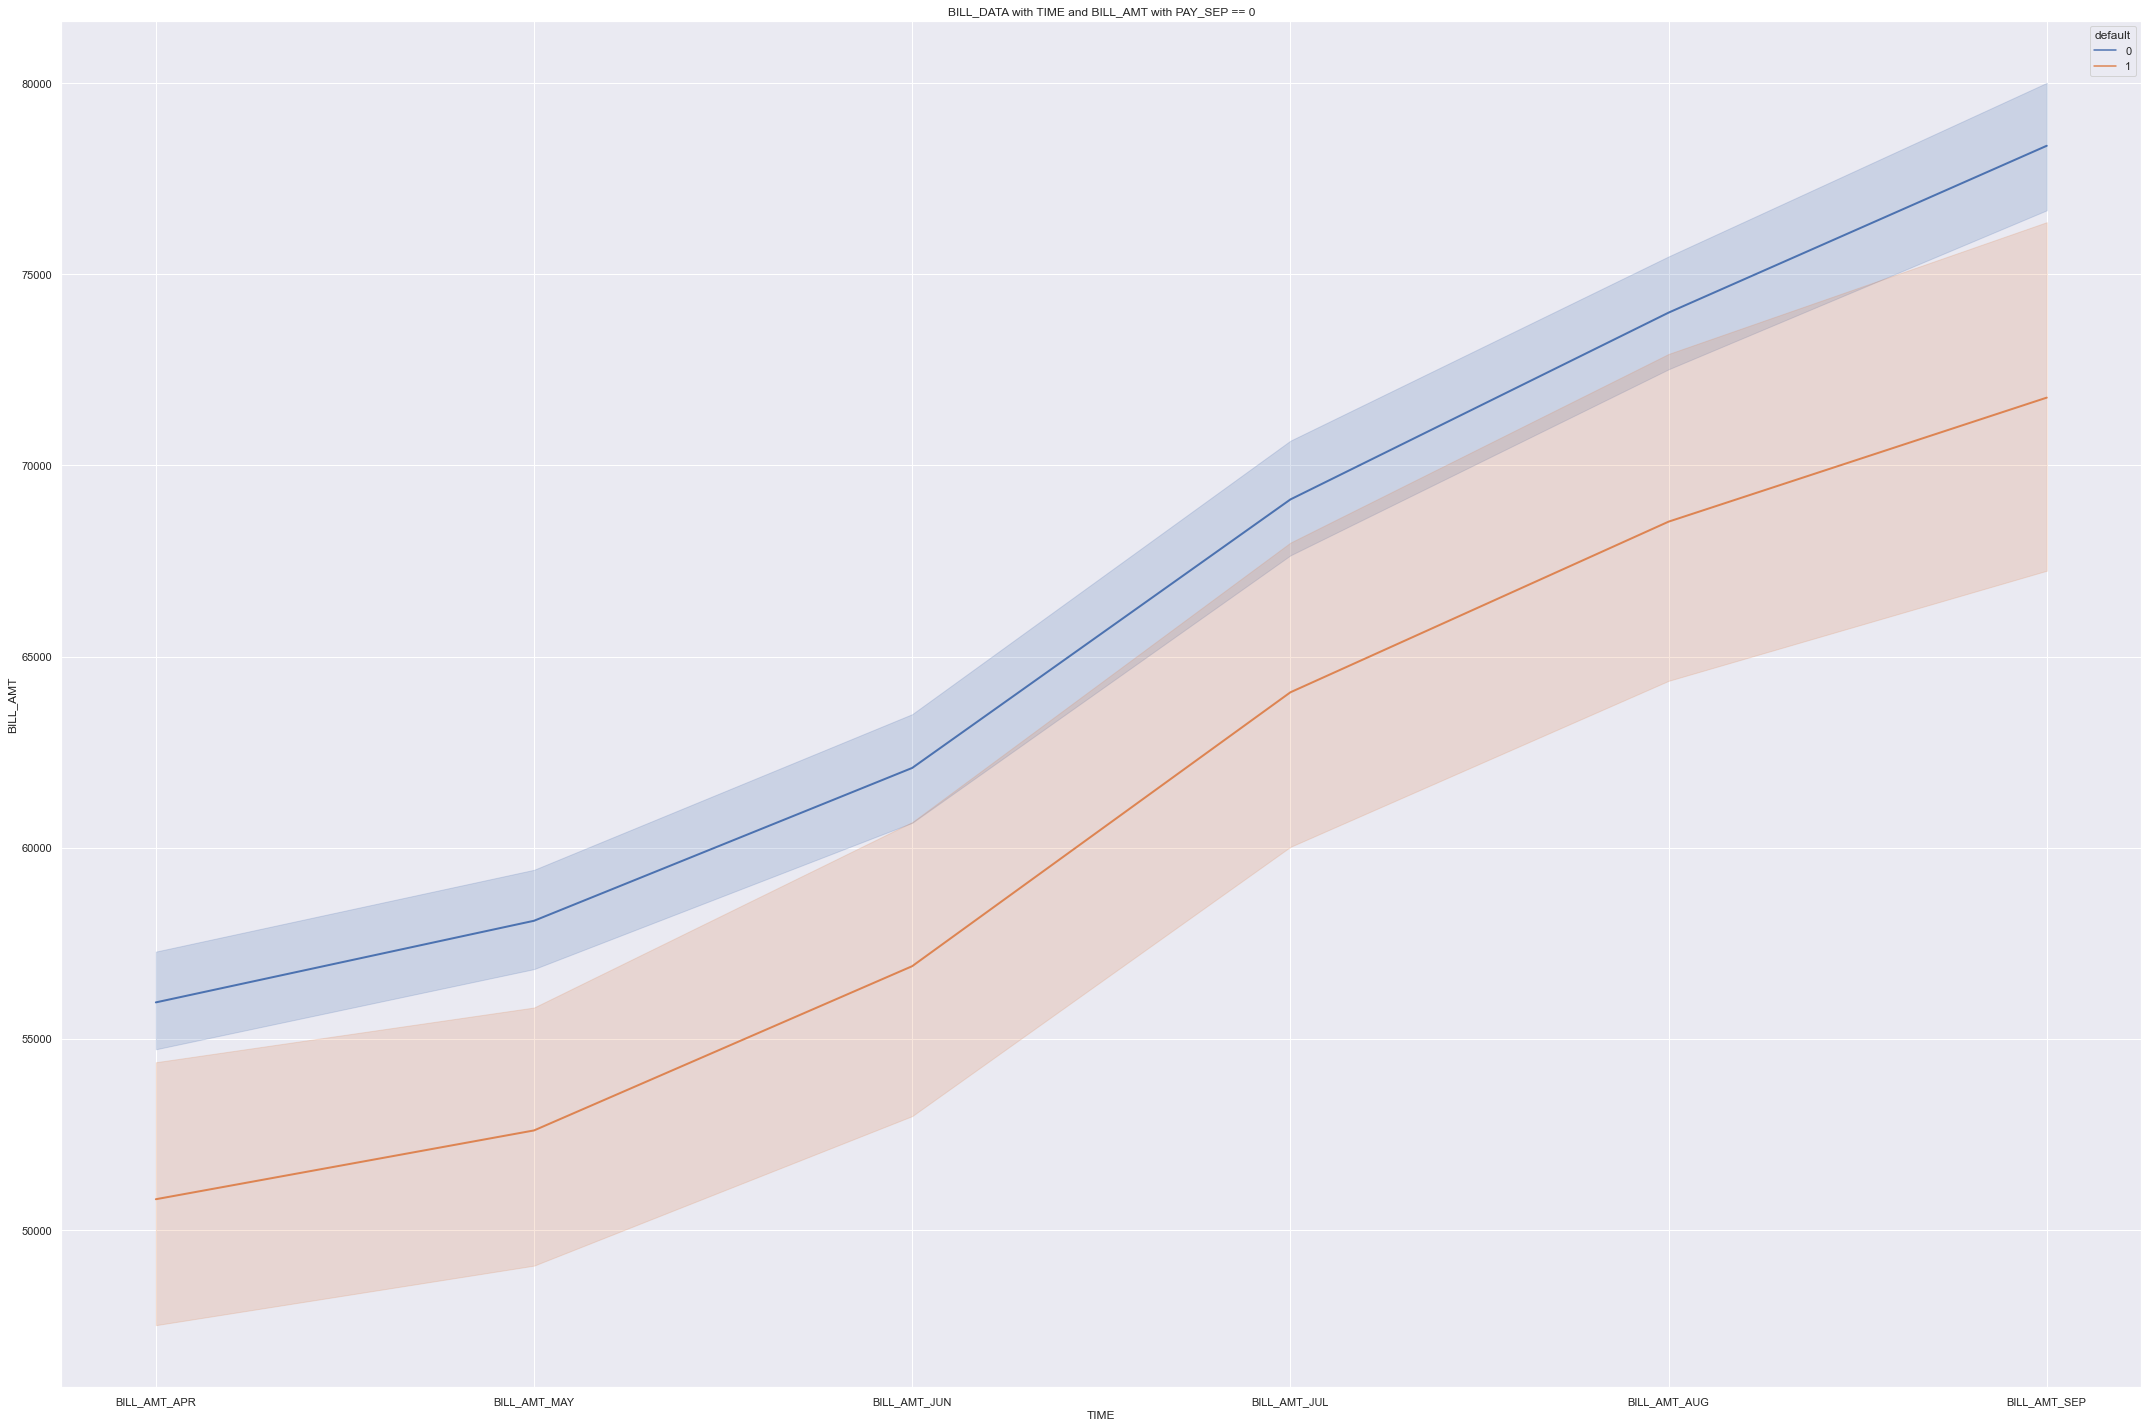

In [63]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == 0"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

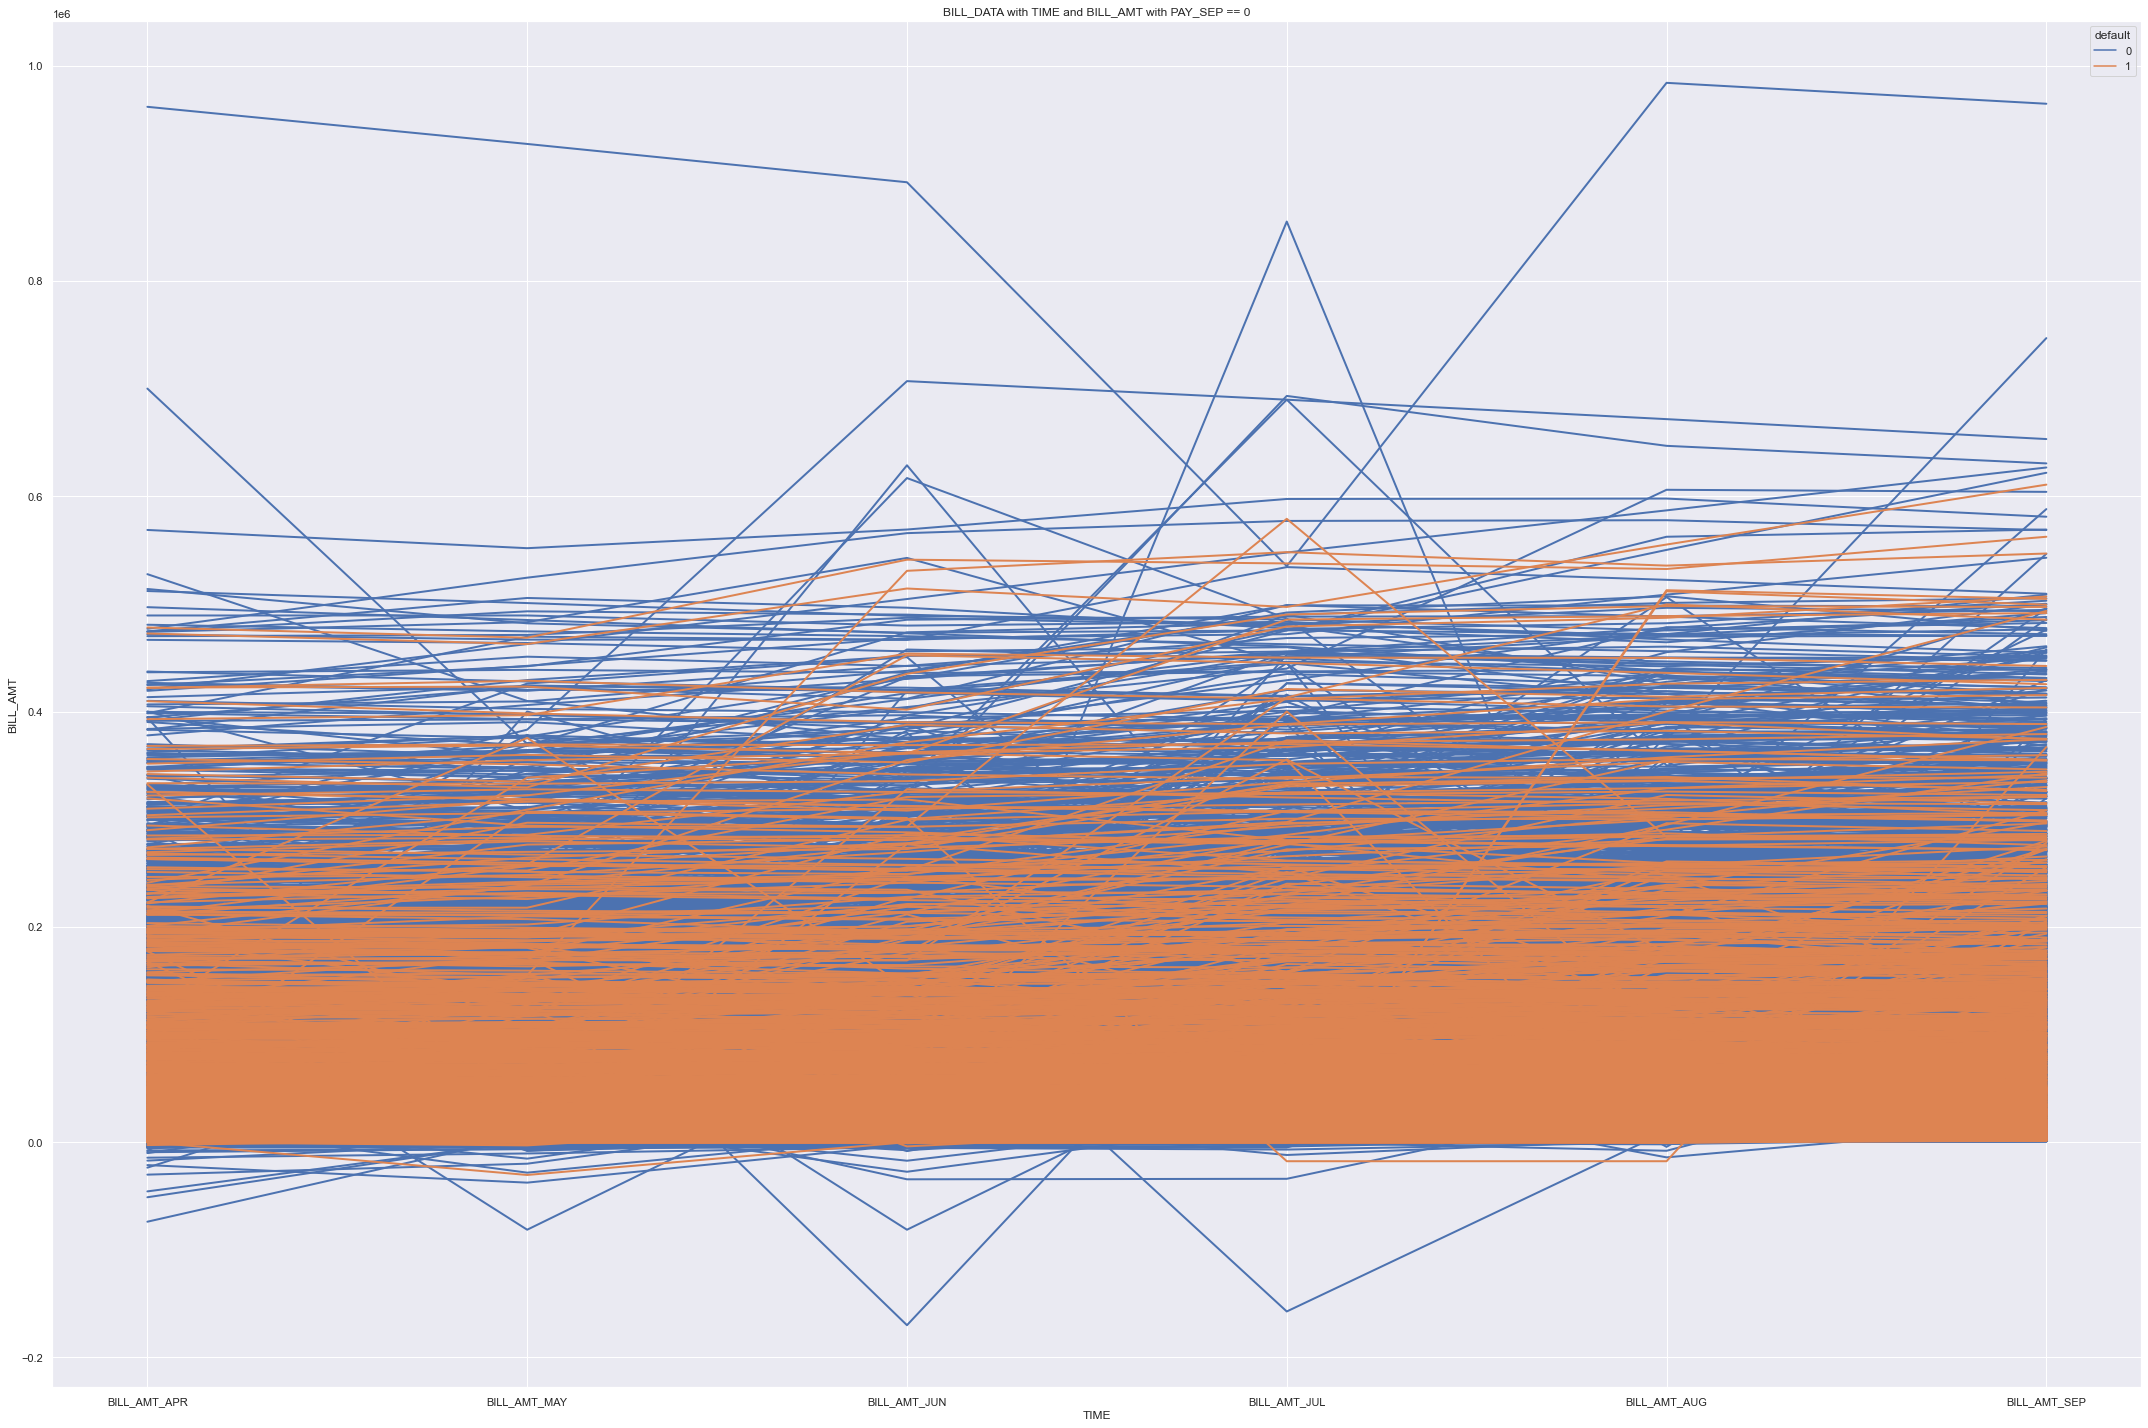

In [69]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == 0"), x = "TIME",  y = "BILL_AMT", 
             hue = "default",units = "ID", estimator = None, lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

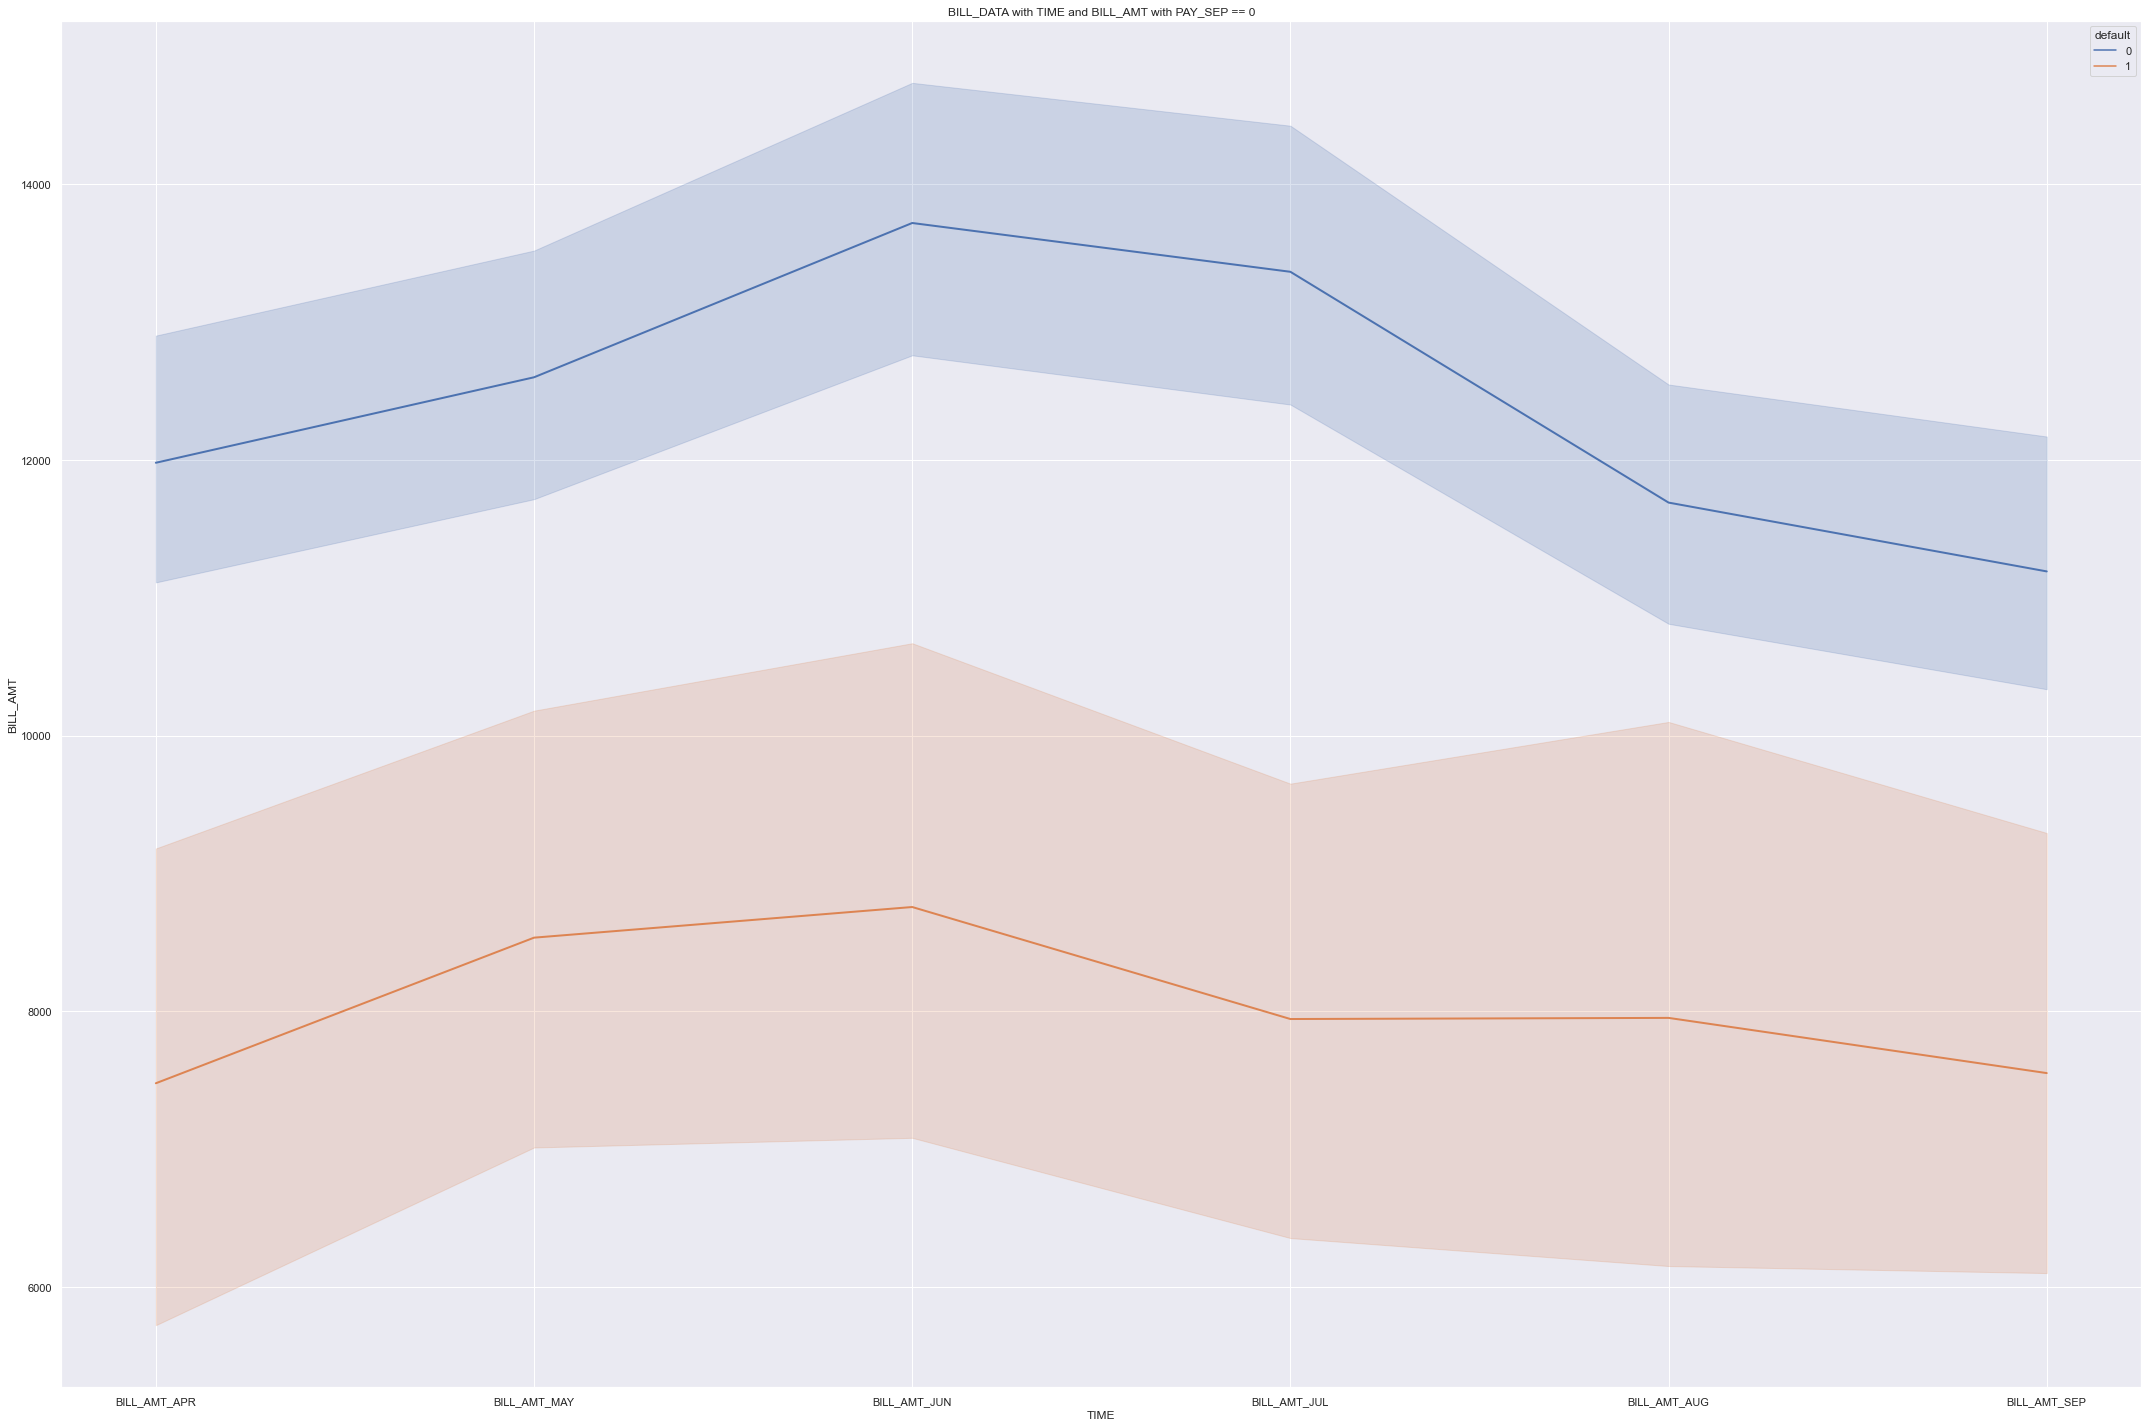

In [67]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == -1"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

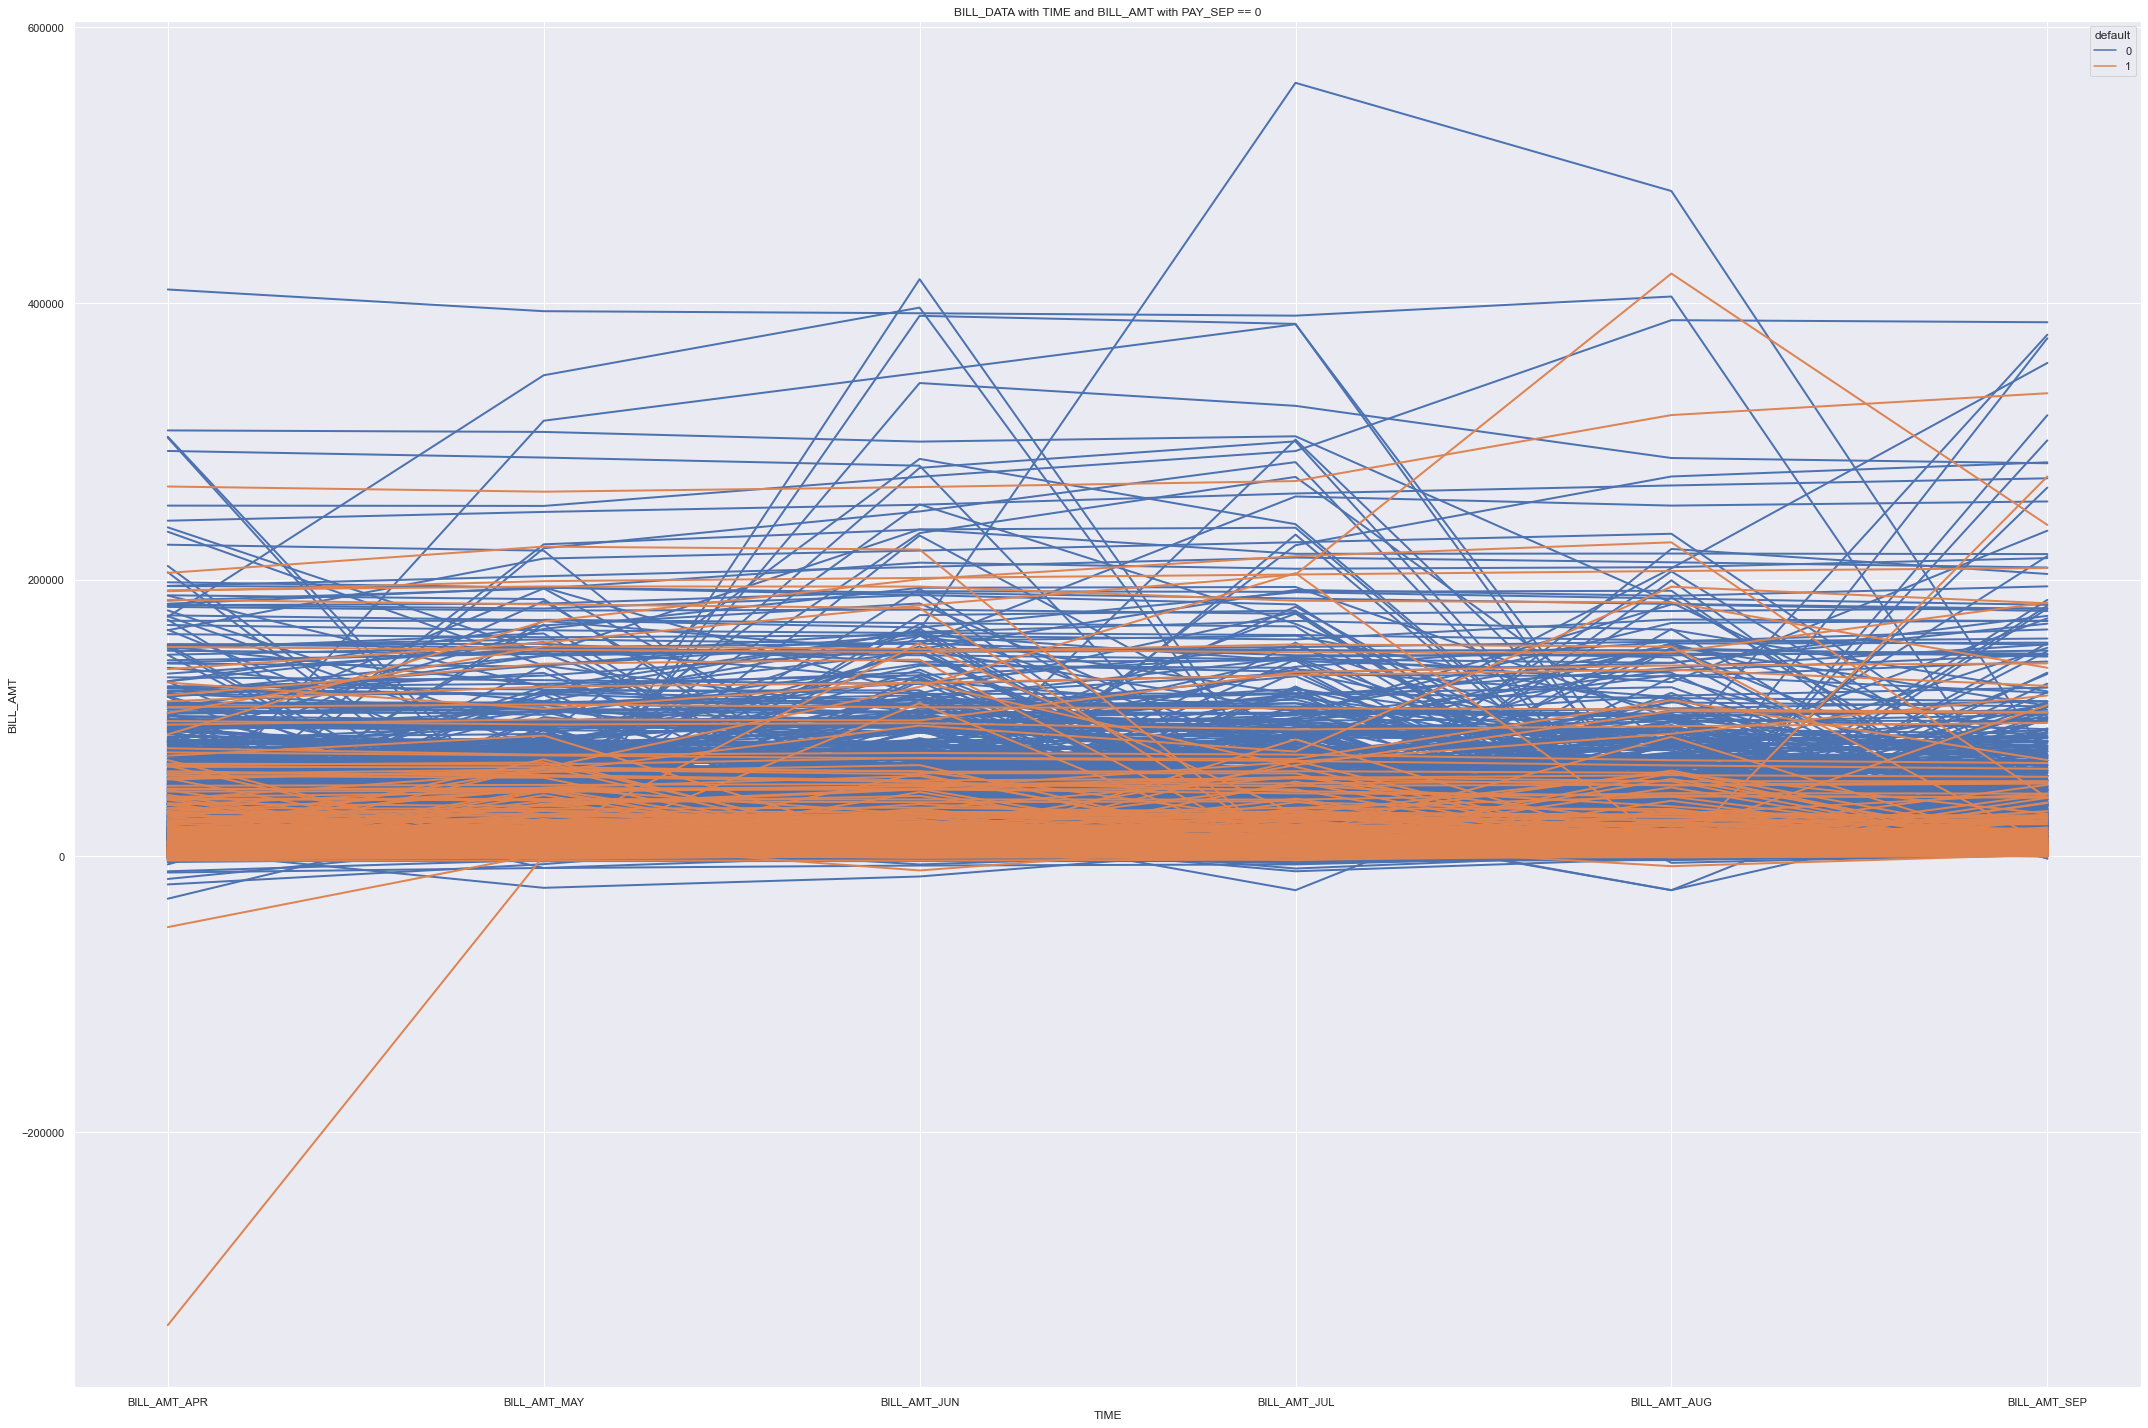

In [66]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == -1"), x = "TIME",  y = "BILL_AMT", 
             hue = "default",units = "ID", estimator = None, lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

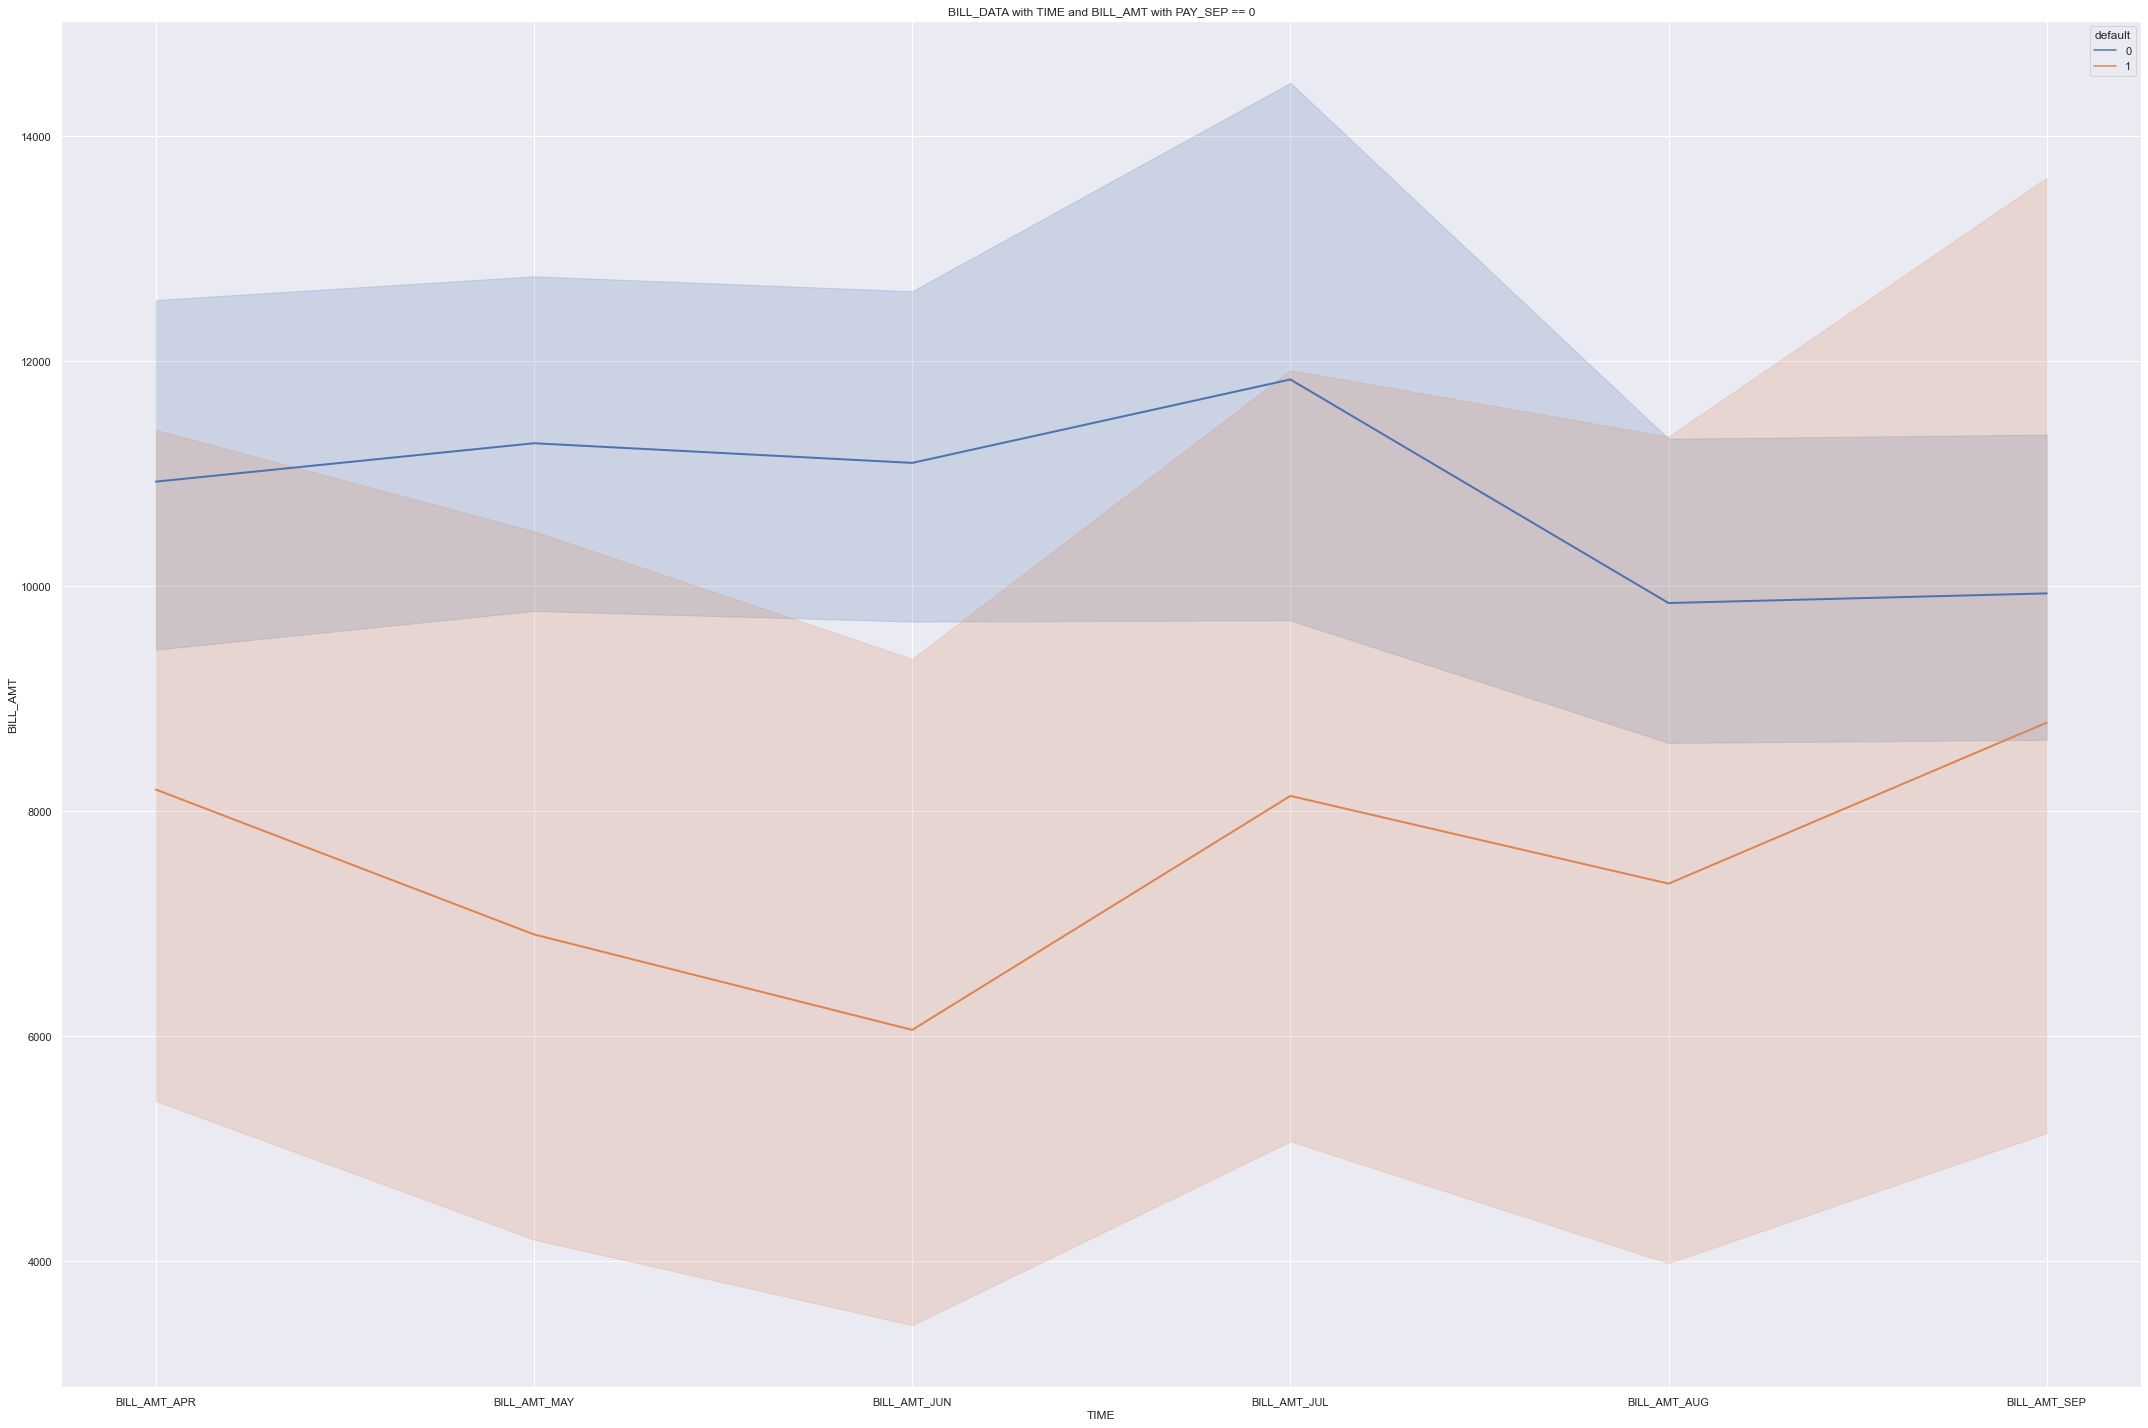

In [65]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == -2"), x = "TIME",  y = "BILL_AMT", 
             hue = "default", lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()

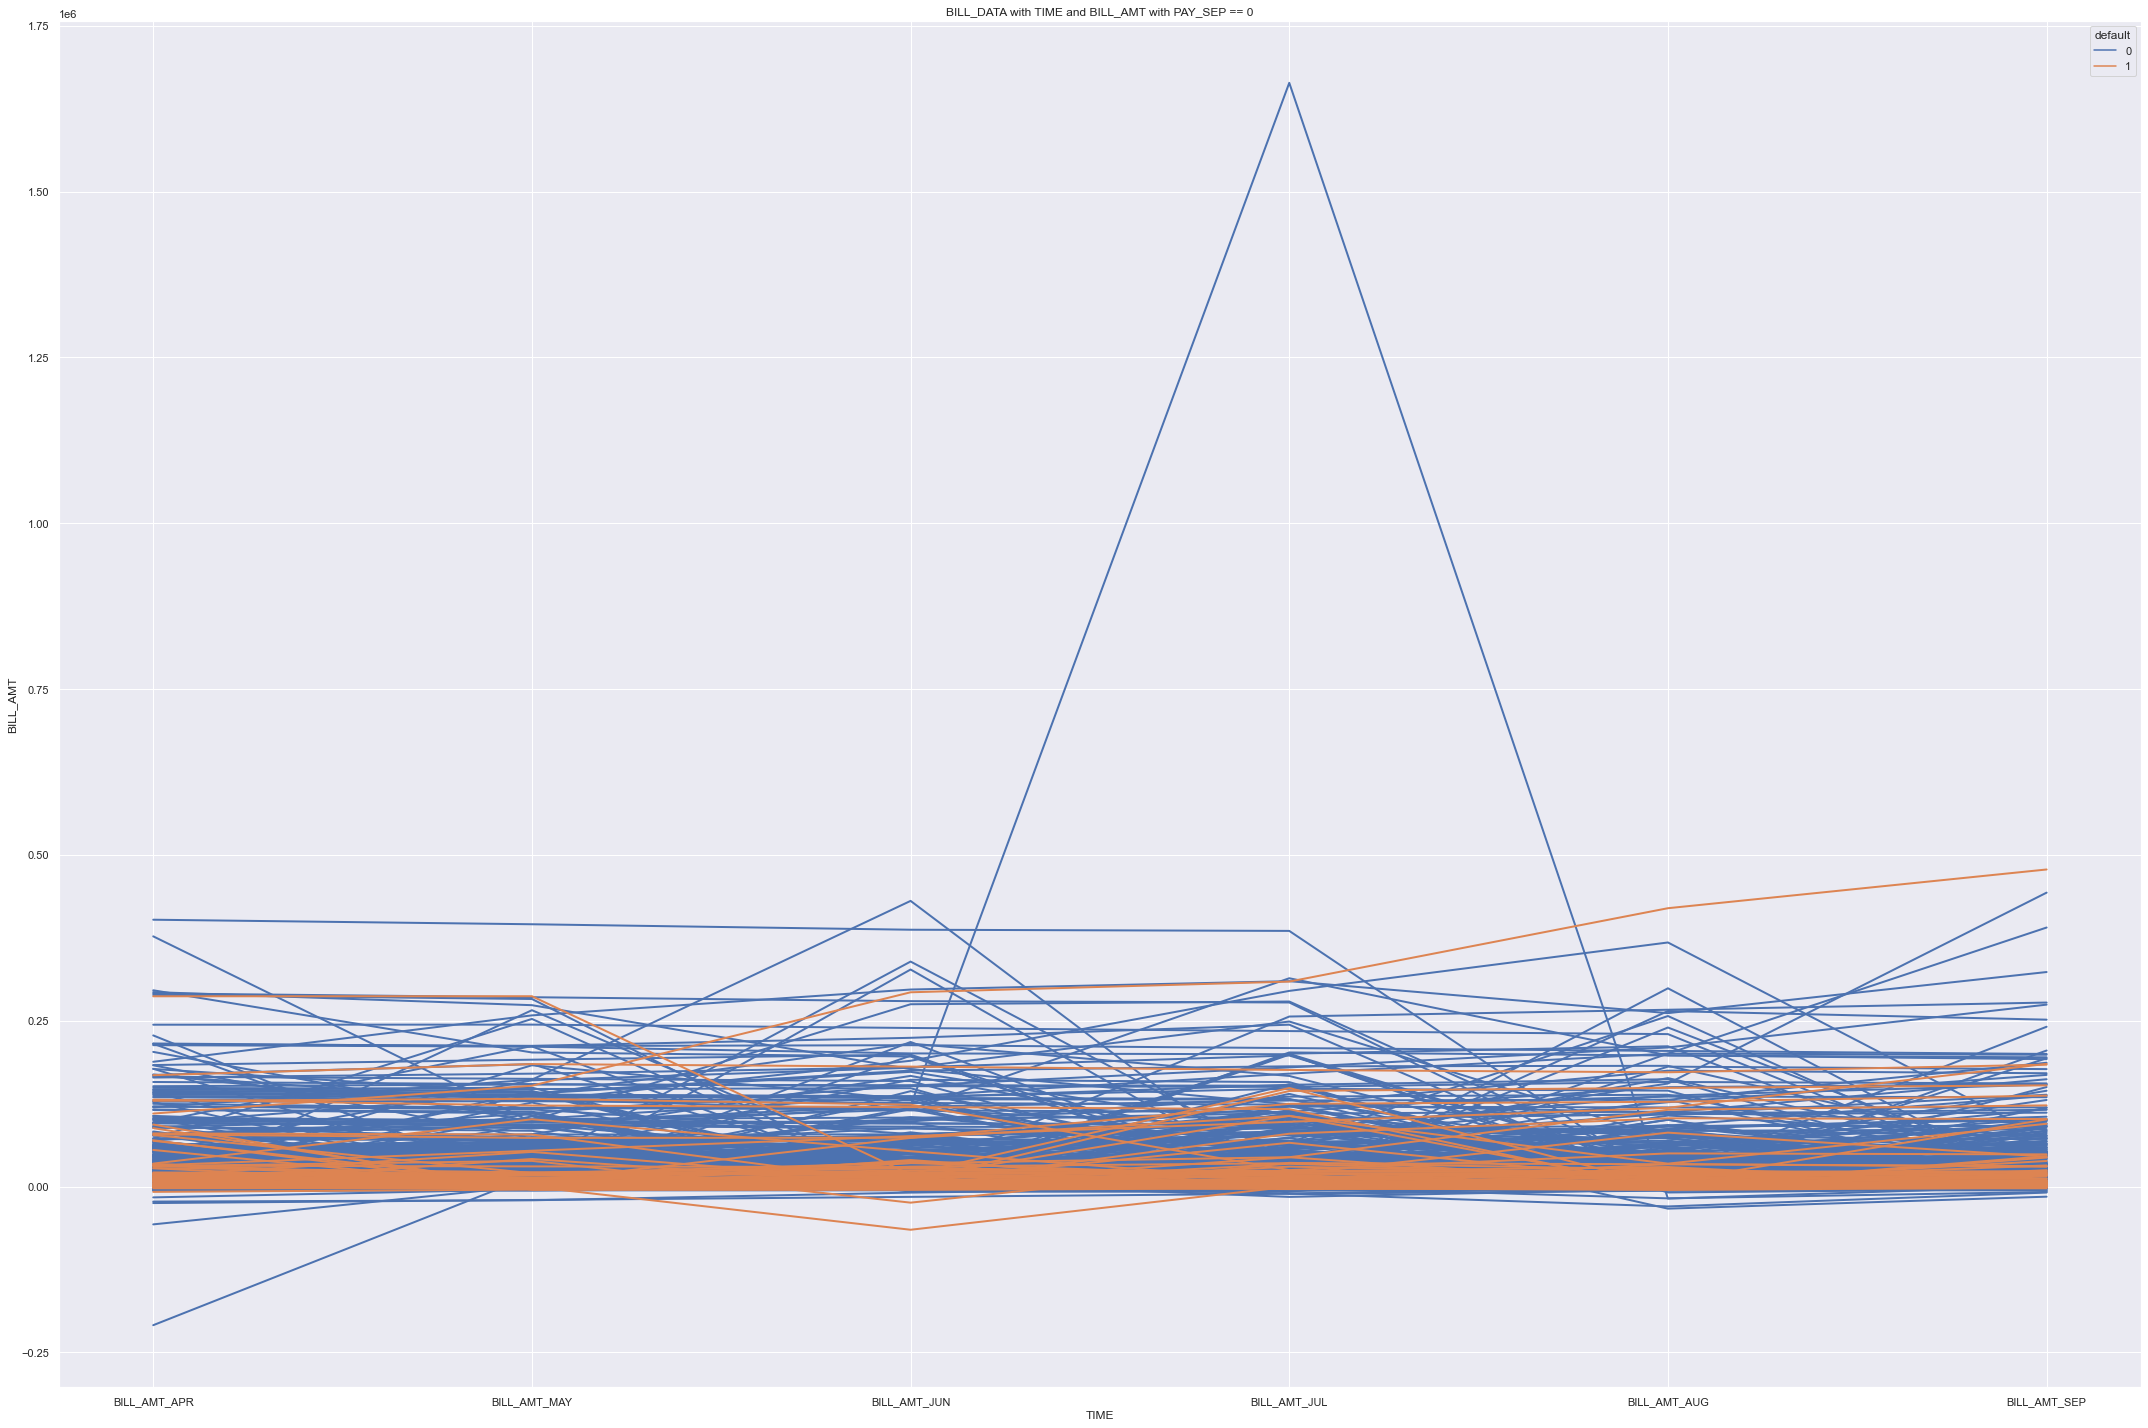

In [68]:
fig, ax = plt.subplots(1, 1, figsize = (30, 20))

sns.lineplot(data = BILL_DATA.query("PAY_SEP  == -2"), x = "TIME",  y = "BILL_AMT", 
             hue = "default",units = "ID", estimator = None, lw = 2, ax = ax)

ax.set_title("BILL_DATA with TIME and BILL_AMT with PAY_SEP == 0")
plt.tight_layout()
plt.show()